In [ ]:
!pip install langdetect

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from langdetect import detect, DetectorFactory
from datetime import datetime
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/hbo.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   _hoodie_commit_time     50000 non-null  int64 
 1   _hoodie_commit_seqno    50000 non-null  object
 2   _hoodie_record_key      50000 non-null  object
 3   _hoodie_partition_path  50000 non-null  object
 4   _hoodie_file_name       50000 non-null  object
 5   id                      50000 non-null  object
 6   contact_id              50000 non-null  object
 7   visibility              50000 non-null  object
 8   creator_id              46120 non-null  object
 9   source                  50000 non-null  object
 10  content                 49396 non-null  object
 11  is_duplicate            50000 non-null  bool  
 12  updated_at              50000 non-null  int64 
 13  created_at_epoch        50000 non-null  int64 
 14  _etl_load_timestamp     50000 non-null  object
 15  da

In [ ]:
df.head()

,_hoodie_commit_time,_hoodie_commit_seqno,_hoodie_record_key,_hoodie_partition_path,_hoodie_file_name,id,contact_id,visibility,creator_id,source,content,is_duplicate,updated_at,created_at_epoch,_etl_load_timestamp,datestr
0,20220916041525,20220916041525_2157_1010851,"id:300b87e6-857c-4f60-bb59-9ef6bafb35c4,datest...",datestr=2022-09-16,0a87561f-7229-4249-9a55-36170258c8bd-0_2157-22...,300b87e6-857c-4f60-bb59-9ef6bafb35c4,2d440055-b053-471f-bdce-af446e307905,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,Do you want to cancel your order? Please choos...,False,1663291070,1663291012,2022-09-16 04:04:27.495,2022-09-16
1,20220919041427,20220919041427_2374_990121,"id:f6f49f2d-97aa-4889-8167-275f678ccb63,datest...",datestr=2022-09-19,4576d85f-1eb3-426a-ad70-42d7a73e25d8-0_2374-22...,f6f49f2d-97aa-4889-8167-275f678ccb63,69c68ddd-1cb5-4837-a859-e4162799132d,external,NaN,system,Chat requested,False,1663548857,1663548540,2022-09-19 04:03:00.788,2022-09-19
2,20220912040721,20220912040721_2464_960107,"id:12ee9e37-eff3-47f4-9653-399cba8de831,datest...",datestr=2022-09-12,eebf7344-8882-453e-8f2f-1f7ad8ffa2af-0_2464-22...,12ee9e37-eff3-47f4-9653-399cba8de831,45fdc382-412a-4670-a2b5-c46ee83e055d,external,ed70680a-8bf6-4308-8e4f-5551dd1c4927,inappsupport,<b>Date of Trip</b>: 2022-09-10,True,1662951673,1662949934,2022-09-12 04:03:24.764,2022-09-12
3,20220922043920,20220922043920_2664_992061,"id:ae723864-eb95-43f3-845e-f0d542773c3d,datest...",datestr=2022-09-22,a3596e98-4940-4ad2-a99c-f411c581206e-0_2664-22...,ae723864-eb95-43f3-845e-f0d542773c3d,01a88ecc-59bf-4126-a941-5d2019d478cf,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,"If you cancel now, you will be charged $36.77 ...",False,1663809269,1663808411,2022-09-22 04:03:41.081,2022-09-22
4,20220910200846,20220910200846_801_311207,"id:86cbd715-4b56-4d38-a379-edbce7db7400,datest...",datestr=2022-09-08,3c092e14-02bd-432a-a9e7-009622002ed6-0_801-22-...,86cbd715-4b56-4d38-a379-edbce7db7400,33a21bcb-cc9c-4ccb-8f0f-e573e24d38e8,external,NaN,system,Chat solicitado,False,1662829853,1662649624,2022-09-10 20:02:42.168,2022-09-08


In [ ]:
df.describe()

,_hoodie_commit_time,updated_at,created_at_epoch
count,5.000000e+04,5.000000e+04,5.000000e+04
mean,2.022091e+13,1.663177e+09,1.662902e+09
std,2.703766e+07,7.706887e+05,8.500302e+05
min,2.022071e+13,1.657669e+09,1.657660e+09
25%,2.022091e+13,1.663027e+09,1.662530e+09
50%,2.022092e+13,1.663293e+09,1.662951e+09
75%,2.022092e+13,1.663634e+09,1.663551e+09
max,2.022092e+13,1.663816e+09,1.663816e+09


In [ ]:
df.isnull().sum()

,0
_hoodie_commit_time,0
_hoodie_commit_seqno,0
_hoodie_record_key,0
_hoodie_partition_path,0
_hoodie_file_name,0
id,0
contact_id,0
visibility,0
creator_id,3880
source,0


In [ ]:
df.dtypes

,0
_hoodie_commit_time,int64
_hoodie_commit_seqno,object
_hoodie_record_key,object
_hoodie_partition_path,object
_hoodie_file_name,object
id,object
contact_id,object
visibility,object
creator_id,object
source,object


In [ ]:
df.isnull().sum()

,0
_hoodie_commit_time,0
_hoodie_commit_seqno,0
_hoodie_record_key,0
_hoodie_partition_path,0
_hoodie_file_name,0
id,0
contact_id,0
visibility,0
creator_id,3880
source,0


In [ ]:
df.isnull().mean() * 100

,0
_hoodie_commit_time,0.000
_hoodie_commit_seqno,0.000
_hoodie_record_key,0.000
_hoodie_partition_path,0.000
_hoodie_file_name,0.000
id,0.000
contact_id,0.000
visibility,0.000
creator_id,7.760
source,0.000


In [ ]:
df.shape

(50000, 16)

In [ ]:
df['creator_id'] = df['creator_id'].fillna('Unknown')   #Filling UA creator id with 'Unknown'

In [ ]:
df['content'] = df['content'].fillna('No content')   #Filling UA content with 'No Content'

In [ ]:
df['datestr'] = pd.to_datetime(df['datestr'], errors='coerce')

Dropping _hoodie_record_key because it has the data which exists in column id and _hoodie_partition_path

In [ ]:
df = df.drop(columns=['_hoodie_record_key', '_hoodie_partition_path'])

In [ ]:
df.head()

,_hoodie_commit_time,_hoodie_commit_seqno,_hoodie_file_name,id,contact_id,visibility,creator_id,source,content,is_duplicate,updated_at,created_at_epoch,_etl_load_timestamp,datestr
0,20220916041525,20220916041525_2157_1010851,0a87561f-7229-4249-9a55-36170258c8bd-0_2157-22...,300b87e6-857c-4f60-bb59-9ef6bafb35c4,2d440055-b053-471f-bdce-af446e307905,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,Do you want to cancel your order? Please choos...,False,1663291070,1663291012,2022-09-16 04:04:27.495,2022-09-16
1,20220919041427,20220919041427_2374_990121,4576d85f-1eb3-426a-ad70-42d7a73e25d8-0_2374-22...,f6f49f2d-97aa-4889-8167-275f678ccb63,69c68ddd-1cb5-4837-a859-e4162799132d,external,Unknown,system,Chat requested,False,1663548857,1663548540,2022-09-19 04:03:00.788,2022-09-19
2,20220912040721,20220912040721_2464_960107,eebf7344-8882-453e-8f2f-1f7ad8ffa2af-0_2464-22...,12ee9e37-eff3-47f4-9653-399cba8de831,45fdc382-412a-4670-a2b5-c46ee83e055d,external,ed70680a-8bf6-4308-8e4f-5551dd1c4927,inappsupport,<b>Date of Trip</b>: 2022-09-10,True,1662951673,1662949934,2022-09-12 04:03:24.764,2022-09-12
3,20220922043920,20220922043920_2664_992061,a3596e98-4940-4ad2-a99c-f411c581206e-0_2664-22...,ae723864-eb95-43f3-845e-f0d542773c3d,01a88ecc-59bf-4126-a941-5d2019d478cf,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,"If you cancel now, you will be charged $36.77 ...",False,1663809269,1663808411,2022-09-22 04:03:41.081,2022-09-22
4,20220910200846,20220910200846_801_311207,3c092e14-02bd-432a-a9e7-009622002ed6-0_801-22-...,86cbd715-4b56-4d38-a379-edbce7db7400,33a21bcb-cc9c-4ccb-8f0f-e573e24d38e8,external,Unknown,system,Chat solicitado,False,1662829853,1662649624,2022-09-10 20:02:42.168,2022-09-08


In [ ]:
df.duplicated().sum() #(Zero Duplicates)

np.int64(0)

In [ ]:
df['content'].nunique()


31530

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
_hoodie_commit_time,50000.0,20220910359981.234375,20220713040630.0,20220913041033.0,20220916041525.0,20220920040813.0,20220922043920.0,27037657.98796
updated_at,50000.0,1663176897.48804,1657668564.0,1663027180.25,1663293086.0,1663633587.0,1663816472.0,770688.660687
created_at_epoch,50000.0,1662901753.81982,1657660370.0,1662529688.5,1662950592.0,1663551275.0,1663816462.0,850030.221189
datestr,50000,2022-09-11 01:25:40.800000,2022-07-12 00:00:00,2022-09-07 00:00:00,2022-09-12 00:00:00,2022-09-19 00:00:00,2022-09-22 00:00:00,NaN


In [ ]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
_hoodie_commit_seqno,50000,50000,20220912201247_1952_57843,1
_hoodie_file_name,50000,1164,a3596e98-4940-4ad2-a99c-f411c581206e-0_2664-22...,4095
id,50000,50000,cabb6a42-49ea-4f57-a2e9-2d0ee10e021a,1
contact_id,50000,48825,026708b1-e9bc-427b-b0d9-1a3d612d2ed6,11
visibility,50000,2,external,32328
creator_id,50000,19527,94058f17-6958-436a-8fa3-4fa6201fa94b,13552
source,50000,6,agent,25520
content,50000,31530,Chat requested,2461
_etl_load_timestamp,50000,230,2022-09-22 04:03:41.081,4334


Shows _hoodie_commit_seqno _hoodie_record_key id are all unique value , remaining columns have duplicated values or repetitive values which can give us insights. First we will clean _hoodie_partition_path by removing "datestr = 2022-09-19 and try to find relation in data


**LETS DO SOME LANGUAGE ANALYSIS**

In [ ]:
DetectorFactory.seed = 0 #for consistancy

In [ ]:
def safe_detect(text):
    try:
        if isinstance(text, str) and text.strip():  # not empty or whitespace
            return detect(text)
        else:
            return None
    except:
        return None

df['language'] = df['content'].apply(safe_detect)


In [ ]:
df['language'].value_counts().head(10)


,count
language,
en,32155
es,4275
pt,3425
fr,1512
it,1308
ro,1026
af,949
ja,672
de,592


en:English, es:Spanish, pt,Porteguese, fr:French, it:Italian, ro:Romanian, af:Afrikaans, jp:Japanese, de:German, ko:Korean

Doing trend Analysis By language :

By Time

In [ ]:
df.isnull().sum()

,0
_hoodie_commit_time,0
_hoodie_commit_seqno,0
_hoodie_file_name,0
id,0
contact_id,0
visibility,0
creator_id,0
source,0
content,0
is_duplicate,0


In [ ]:
df['language'] = df['language'].fillna('NA')

In [ ]:
top_10_languages = df['language'].value_counts().head(10).index

In [ ]:
df_top_10 = df[df['language'].isin(top_10_languages)]

In [ ]:
df_top_10.head(20)

,_hoodie_commit_time,_hoodie_commit_seqno,_hoodie_file_name,id,contact_id,visibility,creator_id,source,content,is_duplicate,updated_at,created_at_epoch,_etl_load_timestamp,datestr,language
0,20220916041525,20220916041525_2157_1010851,0a87561f-7229-4249-9a55-36170258c8bd-0_2157-22...,300b87e6-857c-4f60-bb59-9ef6bafb35c4,2d440055-b053-471f-bdce-af446e307905,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,Do you want to cancel your order? Please choos...,False,1663291070,1663291012,2022-09-16 04:04:27.495,2022-09-16,en
1,20220919041427,20220919041427_2374_990121,4576d85f-1eb3-426a-ad70-42d7a73e25d8-0_2374-22...,f6f49f2d-97aa-4889-8167-275f678ccb63,69c68ddd-1cb5-4837-a859-e4162799132d,external,Unknown,system,Chat requested,False,1663548857,1663548540,2022-09-19 04:03:00.788,2022-09-19,en
2,20220912040721,20220912040721_2464_960107,eebf7344-8882-453e-8f2f-1f7ad8ffa2af-0_2464-22...,12ee9e37-eff3-47f4-9653-399cba8de831,45fdc382-412a-4670-a2b5-c46ee83e055d,external,ed70680a-8bf6-4308-8e4f-5551dd1c4927,inappsupport,<b>Date of Trip</b>: 2022-09-10,True,1662951673,1662949934,2022-09-12 04:03:24.764,2022-09-12,en
3,20220922043920,20220922043920_2664_992061,a3596e98-4940-4ad2-a99c-f411c581206e-0_2664-22...,ae723864-eb95-43f3-845e-f0d542773c3d,01a88ecc-59bf-4126-a941-5d2019d478cf,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,"If you cancel now, you will be charged $36.77 ...",False,1663809269,1663808411,2022-09-22 04:03:41.081,2022-09-22,en
4,20220910200846,20220910200846_801_311207,3c092e14-02bd-432a-a9e7-009622002ed6-0_801-22-...,86cbd715-4b56-4d38-a379-edbce7db7400,33a21bcb-cc9c-4ccb-8f0f-e573e24d38e8,external,Unknown,system,Chat solicitado,False,1662829853,1662649624,2022-09-10 20:02:42.168,2022-09-08,it
5,20220916001925,20220916001925_1868_198702,3c092e14-02bd-432a-a9e7-009622002ed6-0_1868-22...,c090ff6f-82a8-4c47-8e7a-4e7de19fd912,e2fd4f11-e8fb-44d4-9cfa-e4c4348198f9,external,59c67c57-1a54-4a06-ac3f-10fe9dc3adec,inappsupport,Why am I not able to add my debit card?,False,1663266995,1662660553,2022-09-16 00:09:15.431,2022-09-08,en
6,20220911001413,20220911001413_790_194658,3c092e14-02bd-432a-a9e7-009622002ed6-0_790-22-...,bfbb5a85-6127-4225-b02d-ca07862f680d,b74d8ce6-7a4e-47b3-ac5f-5836920fce10,internal,00000000-0000-0000-0000-000000000003,system,Uber Bot connected to Noah,False,1662837049,1662656869,2022-09-11 00:02:12.821,2022-09-08,en
7,20220911001413,20220911001413_790_194659,3c092e14-02bd-432a-a9e7-009622002ed6-0_790-22-...,4540542b-5597-4e68-9880-5b2f2fcb55d9,837079cc-ddf1-492a-8099-0950250a1c9c,internal,00000000-0000-0000-0000-000000000003,system,Uber Bot connected to Soliloquy,False,1662840663,1662660086,2022-09-11 00:02:12.821,2022-09-08,en
8,20220910162003,20220910162003_1675_58520,3c092e14-02bd-432a-a9e7-009622002ed6-0_1675-22...,04c696a1-0b2d-4436-8477-6130abe7bc11,8294fd3d-62a3-426e-ba0f-c116f15bddb3,internal,19508b15-1908-4fe4-bd7a-6cd30b2919c9,agent,JIRA NO PERMITE ENVIAR RESPUESTA AL USUARIO ...,False,1662820058,1662652828,2022-09-10 16:06:49.481,2022-09-08,pt
9,20220910200846,20220910200846_801_311208,3c092e14-02bd-432a-a9e7-009622002ed6-0_801-22-...,9f48d7b6-3394-4fa9-845e-38d8bfb1d5fa,20ceb452-4851-4a41-9847-3405396c31e2,external,Unknown,system,Chat solicitado,False,1662833453,1662653305,2022-09-10 20:02:42.168,2022-09-08,it


In [ ]:
df.shape

(50000, 15)

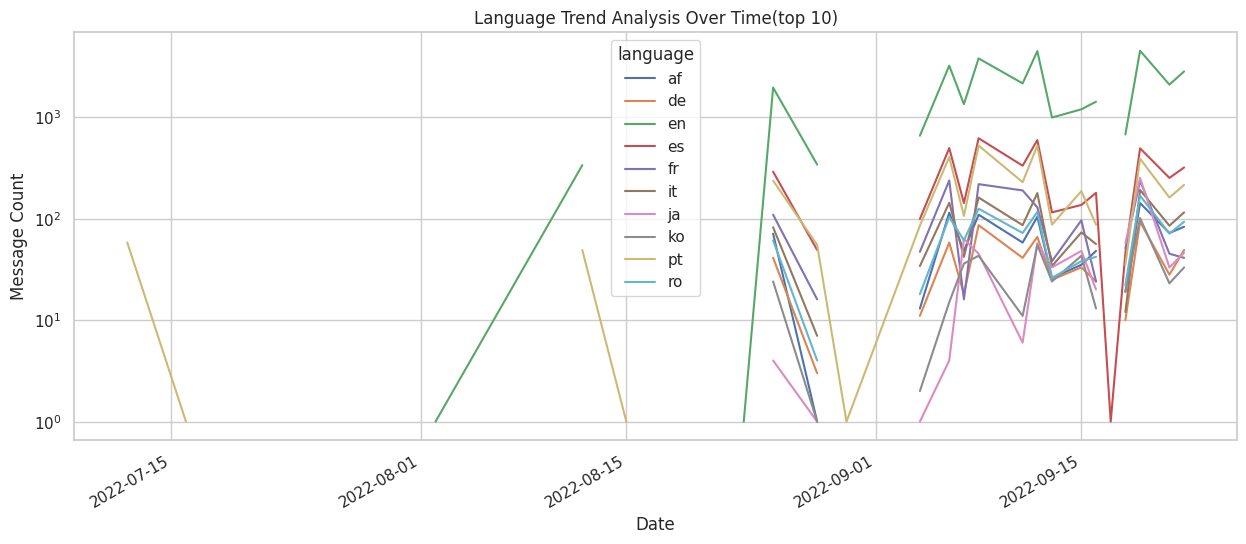

In [ ]:
df_top_10.groupby(['datestr', 'language']).size().unstack().plot(figsize=(15, 6), title='Language Trend Analysis Over Time(top 10)', logy=True)
plt.ylabel('Message Count')
plt.xlabel('Date')
plt.show()

BY SOURCE


In [ ]:
df.shape

(50000, 15)

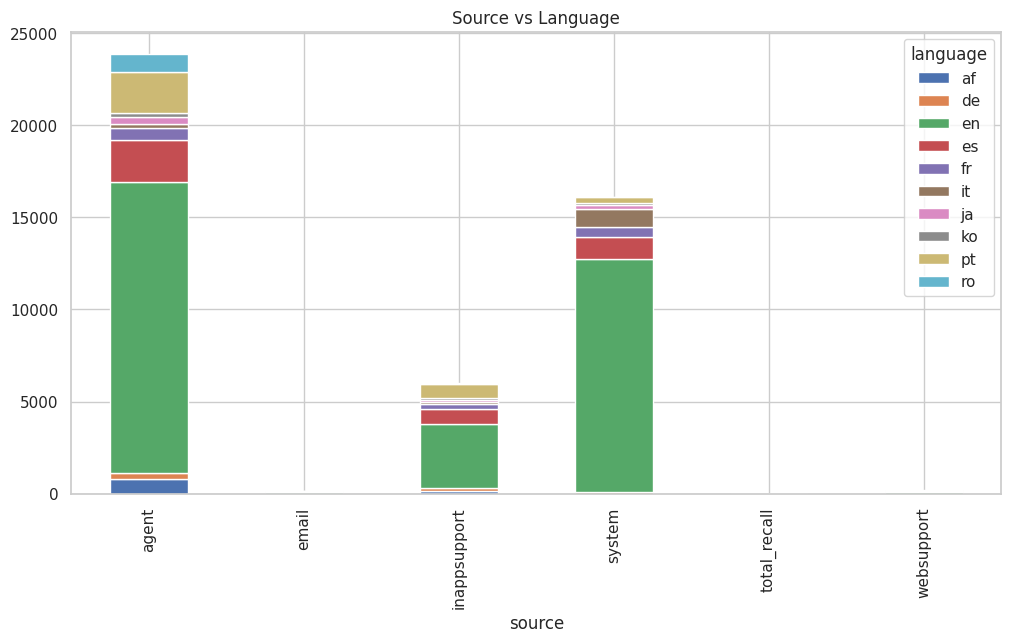

In [ ]:
cross_tab = pd.crosstab(df['source'], df_top_10['language'])

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), title='Source vs Language')

plt.show()

In [ ]:
english_msgs = df[df['language'] == 'en']
# Count by source
english_msgs['source'].value_counts()


,count
source,
agent,15812
system,12666
inappsupport,3465
websupport,110
email,100
total_recall,2


In [ ]:
# Cross-tab for count
lang_by_source = pd.crosstab(df['language'], df['source'])
# Normalize (row-wise percentages)
lang_by_source_pct = lang_by_source.div(lang_by_source.sum(axis=1), axis=0) * 100
# Get top 10 languages
top_10_langs = df['language'].value_counts().head(10).index
# Show top 10 languages
lang_by_source_pct.loc[top_10_langs].round(2)


source,agent,email,inappsupport,system,total_recall,websupport
language,,,,,,
en,49.17,0.31,10.78,39.39,0.01,0.34
es,53.17,0.44,18.55,27.18,0.02,0.63
pt,65.52,0.58,23.53,9.46,0.00,0.91
fr,44.11,0.46,17.99,36.84,0.00,0.60
it,15.90,0.00,8.49,75.54,0.00,0.08
ro,97.08,0.00,1.95,0.97,0.00,0.00
af,83.03,0.00,16.65,0.32,0.00,0.00
ja,53.27,0.00,16.22,29.46,0.00,1.04
de,55.07,0.00,28.55,15.88,0.00,0.51


In [ ]:
# Normalize (column-wise percentages)
source_by_lang_pct = lang_by_source.div(lang_by_source.sum(axis=0), axis=1) * 100

# top 10 languages only
source_by_lang_pct.loc[top_10_langs].T.round(2)


language,en,es,pt,fr,it,ro,af,ja,de,ko
source,,,,,,,,,,
agent,61.96,8.91,8.79,2.61,0.82,3.90,3.09,1.40,1.28,0.88
email,64.52,12.26,12.90,4.52,0.00,0.00,0.00,0.00,0.00,0.00
inappsupport,47.60,10.89,11.07,3.74,1.52,0.27,2.17,1.50,2.32,1.32
system,75.19,6.90,1.92,3.31,5.86,0.06,0.02,1.18,0.56,0.74
total_recall,66.67,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
websupport,55.84,13.71,15.74,4.57,0.51,0.00,0.00,3.55,1.52,1.52


In [ ]:
df.shape

(50000, 15)

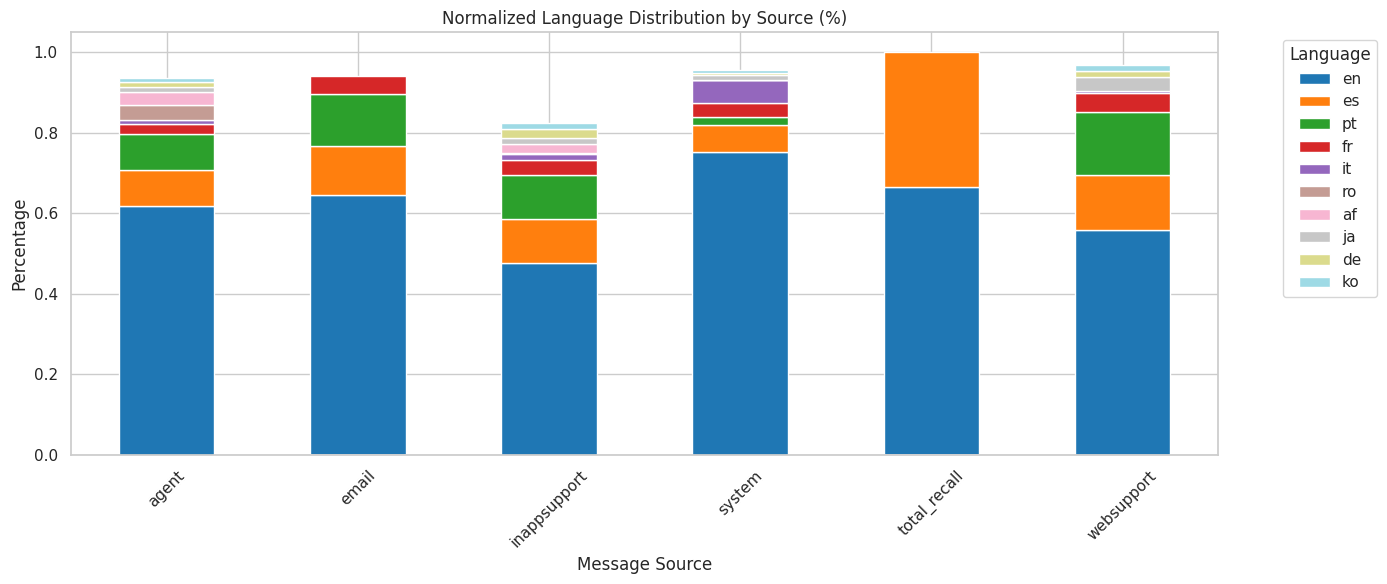

In [ ]:
lang_per_source_pct = pd.crosstab(df['source'], df['language'])
lang_per_source_pct = lang_per_source_pct.div(lang_per_source_pct.sum(axis=1), axis=0)

lang_per_source_pct[top_10_langs].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20',
    title='Normalized Language Distribution by Source (%)'
)

plt.ylabel('Percentage')
plt.xlabel('Message Source')
plt.xticks(rotation=45)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


NUmber of Messages perDay/Week

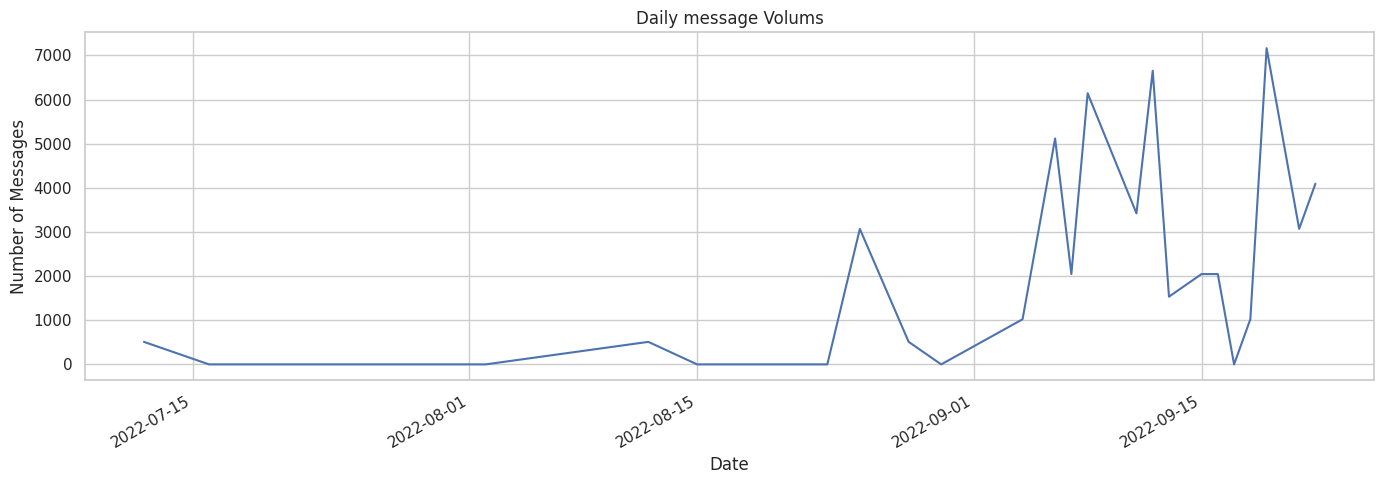

In [ ]:
df['datestr'] = pd.to_datetime(df['datestr'])

daily_counts = df.groupby('datestr').size()

daily_counts.plot(figsize=(14,5), title= 'Daily message Volums')
plt.ylabel('Number of Messages')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

Weekly Trend

In [ ]:
df['week'] = df['datestr'].dt.to_period('W').apply(lambda r: r.start_time.date())  # start of the week
df['date'] = df['datestr'].dt.date  # just date (optional)

In [ ]:
# Filter data to keep only rows on or after 15-08-2022
df = df[df['datestr'] >= pd.to_datetime('2022-08-15')]

In [ ]:
df.shape

(48975, 17)

In [ ]:
# Group by 'week' and count the number of entries
weekly_counts = df.groupby('week').size()

# Optional: Convert the result to a DataFrame and reset the index
weekly_counts_df = weekly_counts.reset_index()
weekly_counts_df.columns = ['week', 'count']

print(weekly_counts_df)

         week  count
0  2022-08-15      1
1  2022-08-22   3582
2  2022-08-29   1024
3  2022-09-05  16730
4  2022-09-12  13307
5  2022-09-19  14331


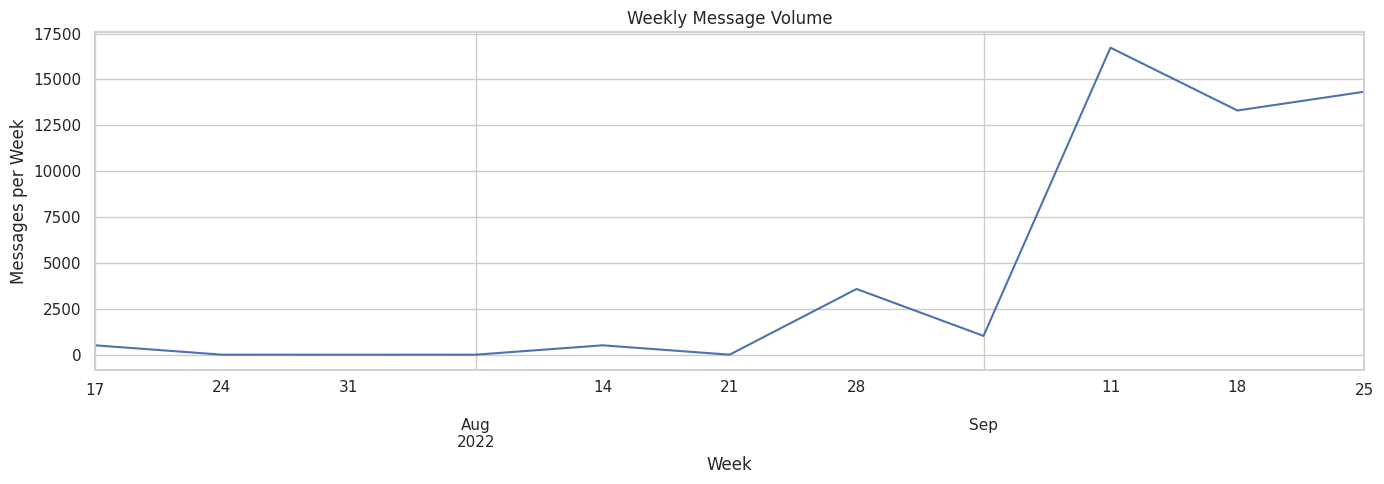

In [ ]:
# Weekly resample
weekly_counts = daily_counts.resample('W').sum()

weekly_counts.plot(figsize=(14, 5), title='Weekly Message Volume')
plt.ylabel('Messages per Week')
plt.xlabel('Week')
plt.grid(True)
plt.tight_layout()
plt.show()


After looking at the data , we can see there are only a few messages before 01-08-2022 which can be because of missing data from those dates so we should actually remove all the data before those dates for better interpretation

In [ ]:
df = df[df['datestr'] >= pd.to_datetime('2022-08-01')]

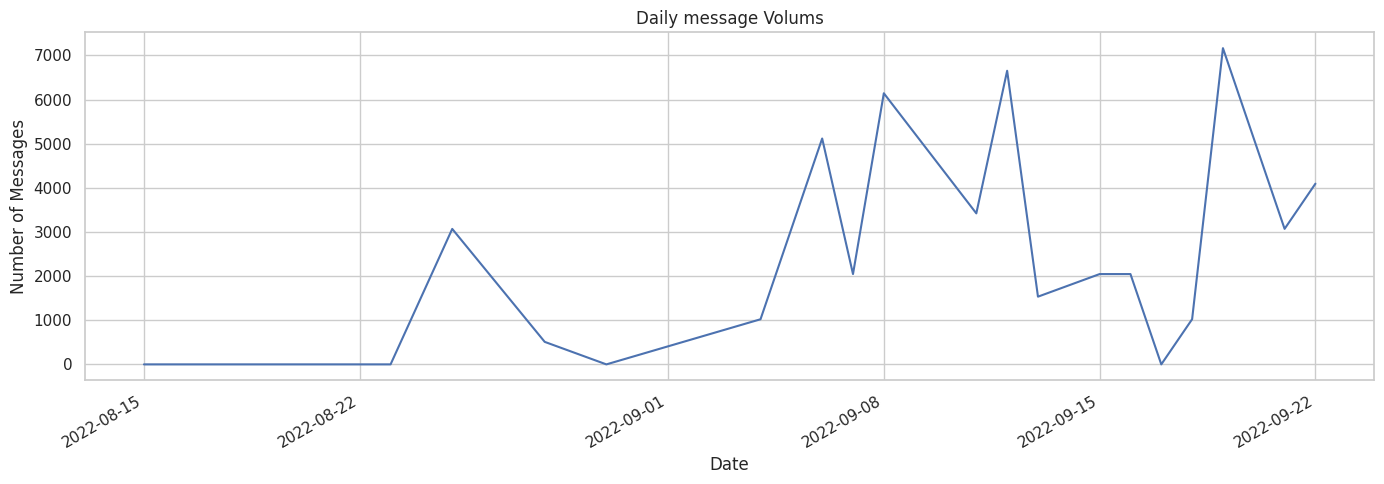

In [ ]:
df['datestr'] = pd.to_datetime(df['datestr'])

daily_counts = df.groupby('datestr').size()

daily_counts.plot(figsize=(14,5), title= 'Daily message Volums')
plt.ylabel('Number of Messages')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

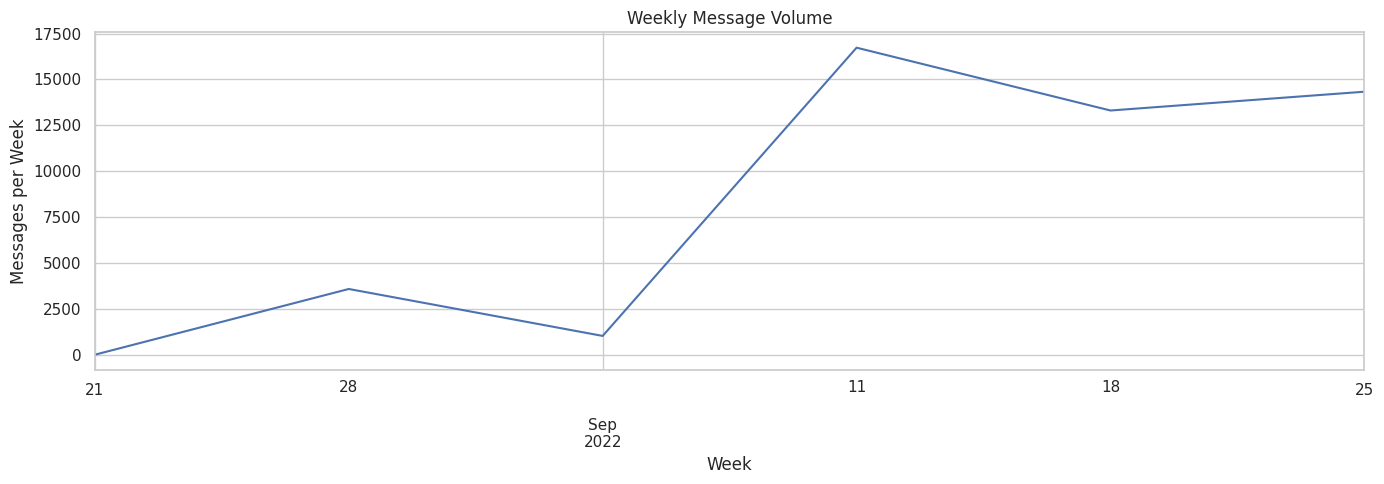

In [ ]:
# Weekly resample
weekly_counts = daily_counts.resample('W').sum()

weekly_counts.plot(figsize=(14, 5), title='Weekly Message Volume')
plt.ylabel('Messages per Week')
plt.xlabel('Week')
plt.grid(True)
plt.tight_layout()
plt.show()


Peak Traffic Hours

Calculating Response time

In [ ]:
df.shape

(48975, 17)

In [ ]:
df['response_time_sec'] = df['updated_at'] - df['created_at_epoch']

In [ ]:
df['updated_time'] = pd.to_datetime(df['updated_at'], unit='s')
df['created_time'] = pd.to_datetime(df['created_at_epoch'], unit='s')

<ipython-input-411-cbe5a961f310>:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


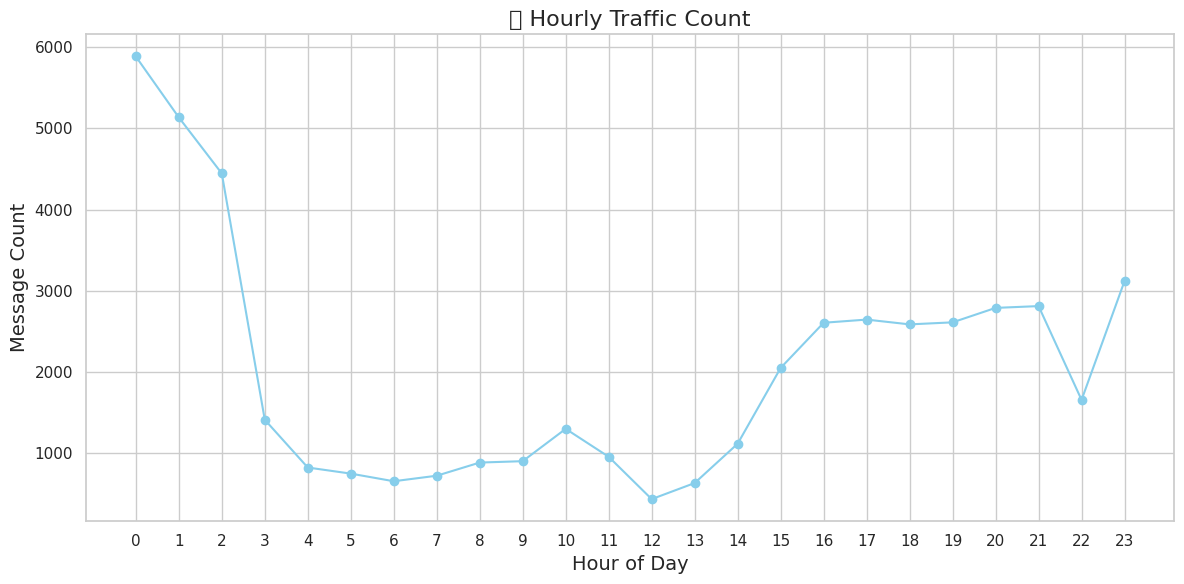

In [ ]:


# Extract the hour from the update_time
df['created_hour'] = df['created_time'].dt.hour

# Count the number of messages per hour
hourly_counts = df.groupby('created_hour')['id'].count().reset_index(name='count')

# Plot the hourly traffic
plt.figure(figsize=(12, 6))
plt.plot(hourly_counts['created_hour'], hourly_counts['count'], marker='o', linestyle='-', color='skyblue')

# Customize the plot
plt.title('📈 Hourly Traffic Count', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Message Count', fontsize=14)
plt.xticks(range(0, 24))  # Display hours from 0 to 23
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


We will drop created at epoch ,updated at, hoodie commit seqno, hoodie file name to clean our data, etl_load_timestamp (as it is nearly same as updated at) we can use any one of them for our analysis

In [ ]:
df = df.drop(columns=[ '_hoodie_commit_seqno', '_hoodie_file_name', '_etl_load_timestamp'])

In [ ]:
df.dtypes

,0
_hoodie_commit_time,int64
id,object
contact_id,object
visibility,object
creator_id,object
source,object
content,object
is_duplicate,bool
updated_at,int64
created_at_epoch,int64


In [ ]:
df.head(50)

,_hoodie_commit_time,id,contact_id,visibility,creator_id,source,content,is_duplicate,updated_at,created_at_epoch,datestr,language,week,date,response_time_sec,updated_time,created_time,created_hour
0,20220916041525,300b87e6-857c-4f60-bb59-9ef6bafb35c4,2d440055-b053-471f-bdce-af446e307905,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,Do you want to cancel your order? Please choos...,False,1663291070,1663291012,2022-09-16,en,2022-09-12,2022-09-16,58,2022-09-16 01:17:50,2022-09-16 01:16:52,1
1,20220919041427,f6f49f2d-97aa-4889-8167-275f678ccb63,69c68ddd-1cb5-4837-a859-e4162799132d,external,Unknown,system,Chat requested,False,1663548857,1663548540,2022-09-19,en,2022-09-19,2022-09-19,317,2022-09-19 00:54:17,2022-09-19 00:49:00,0
2,20220912040721,12ee9e37-eff3-47f4-9653-399cba8de831,45fdc382-412a-4670-a2b5-c46ee83e055d,external,ed70680a-8bf6-4308-8e4f-5551dd1c4927,inappsupport,<b>Date of Trip</b>: 2022-09-10,True,1662951673,1662949934,2022-09-12,en,2022-09-12,2022-09-12,1739,2022-09-12 03:01:13,2022-09-12 02:32:14,2
3,20220922043920,ae723864-eb95-43f3-845e-f0d542773c3d,01a88ecc-59bf-4126-a941-5d2019d478cf,external,94058f17-6958-436a-8fa3-4fa6201fa94b,agent,"If you cancel now, you will be charged $36.77 ...",False,1663809269,1663808411,2022-09-22,en,2022-09-19,2022-09-22,858,2022-09-22 01:14:29,2022-09-22 01:00:11,1
4,20220910200846,86cbd715-4b56-4d38-a379-edbce7db7400,33a21bcb-cc9c-4ccb-8f0f-e573e24d38e8,external,Unknown,system,Chat solicitado,False,1662829853,1662649624,2022-09-08,it,2022-09-05,2022-09-08,180229,2022-09-10 17:10:53,2022-09-08 15:07:04,15
5,20220916001925,c090ff6f-82a8-4c47-8e7a-4e7de19fd912,e2fd4f11-e8fb-44d4-9cfa-e4c4348198f9,external,59c67c57-1a54-4a06-ac3f-10fe9dc3adec,inappsupport,Why am I not able to add my debit card?,False,1663266995,1662660553,2022-09-08,en,2022-09-05,2022-09-08,606442,2022-09-15 18:36:35,2022-09-08 18:09:13,18
6,20220911001413,bfbb5a85-6127-4225-b02d-ca07862f680d,b74d8ce6-7a4e-47b3-ac5f-5836920fce10,internal,00000000-0000-0000-0000-000000000003,system,Uber Bot connected to Noah,False,1662837049,1662656869,2022-09-08,en,2022-09-05,2022-09-08,180180,2022-09-10 19:10:49,2022-09-08 17:07:49,17
7,20220911001413,4540542b-5597-4e68-9880-5b2f2fcb55d9,837079cc-ddf1-492a-8099-0950250a1c9c,internal,00000000-0000-0000-0000-000000000003,system,Uber Bot connected to Soliloquy,False,1662840663,1662660086,2022-09-08,en,2022-09-05,2022-09-08,180577,2022-09-10 20:11:03,2022-09-08 18:01:26,18
8,20220910162003,04c696a1-0b2d-4436-8477-6130abe7bc11,8294fd3d-62a3-426e-ba0f-c116f15bddb3,internal,19508b15-1908-4fe4-bd7a-6cd30b2919c9,agent,JIRA NO PERMITE ENVIAR RESPUESTA AL USUARIO ...,False,1662820058,1662652828,2022-09-08,pt,2022-09-05,2022-09-08,167230,2022-09-10 14:27:38,2022-09-08 16:00:28,16
9,20220910200846,9f48d7b6-3394-4fa9-845e-38d8bfb1d5fa,20ceb452-4851-4a41-9847-3405396c31e2,external,Unknown,system,Chat solicitado,False,1662833453,1662653305,2022-09-08,it,2022-09-05,2022-09-08,180148,2022-09-10 18:10:53,2022-09-08 16:08:25,16


Creating a new columns "updated_time" "created_time" in datetime format

Now converting response time to minutes and secs

In [ ]:
df['response_time_min'] = df['response_time_sec'].apply(
    lambda x: f"{x // 60} min {x % 60} sec"
)

Adding hours for better clearity in response time

In [ ]:
df.isnull().sum()

,0
_hoodie_commit_time,0
id,0
contact_id,0
visibility,0
creator_id,0
source,0
content,0
is_duplicate,0
updated_at,0
created_at_epoch,0


Converting back to seconds to filter response tie based on response time taken

In [ ]:
# Define thresholds in hours
thresholds_hours = [1, 5, 24, 48, 72, 96,120, 144, 168, 192, 216,240]

# Print header
print("Tickets with response time greater than:")
print("-----------------------------------------")

# Loop through thresholds
for hr in thresholds_hours:
    sec = hr * 3600
    count = (df['response_time_sec'] > sec).sum()
    print(f"> {hr} hours : {count}")


Tickets with response time greater than:
-----------------------------------------
> 1 hours : 35933
> 5 hours : 33355
> 24 hours : 31550
> 48 hours : 30203
> 72 hours : 16831
> 96 hours : 16303
> 120 hours : 15848
> 144 hours : 15437
> 168 hours : 15140
> 192 hours : 1333
> 216 hours : 690
> 240 hours : 458


In [ ]:
# Grouping language and source counts for each threshold
thresholds_hours = [1, 5, 24, 48, 72, 96,120, 144, 168, 192, 216,240]

language_source_summary = {}

for hr in thresholds_hours:
    sec = hr * 3600
    label = f'>{hr}hr'

    # Filter the DataFrame
    filtered = df[df['response_time_sec'] > sec]

    # Group by language and source
    grouped = filtered.groupby(['language', 'source']).size().reset_index(name='count')

    # Store the grouped data in dictionary
    language_source_summary[label] = grouped

language_source_summary['>24hr'].head()


,language,source,count
0,NA,agent,90
1,NA,inappsupport,53
2,af,agent,381
3,af,inappsupport,102
4,af,system,2


This method shows distribution at that specific time threshold, not retention within each language.

"Of all interactions older than 240 hours, what % were in English?"

In [ ]:
# Number of top languages you want (top 10 by total count)
top_n_languages = 10

# Loop through each threshold
for label, df_grouped in language_source_summary.items():
    # Calculate total count for each language
    language_totals = df_grouped.groupby('language')['count'].sum()

    # Get the top 10 languages by total count
    top_languages = language_totals.nlargest(top_n_languages).index

    # Filter the data for the top 10 languages
    df_filtered = df_grouped[df_grouped['language'].isin(top_languages)]

    # Get total count across all languages
    overall_total = df_grouped['count'].sum()

    # For each language, find the top source (by count)
    top_sources = (
        df_filtered
        .sort_values(by=['language', 'count'], ascending=[True, False])
        .groupby('language')
        .head(1)
        .copy()
    )

    # Add percentage based on total count across all languages
    top_sources['percentage'] = (top_sources['count'] / overall_total) * 100

    # Sort final result by percentage descending
    top_sources = top_sources.sort_values(by='percentage', ascending=False)

    # Output the result
    print(f"\n🔹 Top source (by count) for top {top_n_languages} languages in {label} (percentage of total interactions):")
    print(top_sources[['language', 'source', 'count', 'percentage']])



🔹 Top source (by count) for top 10 languages in >1hr (percentage of total interactions):
    language  source  count  percentage
33        en   agent  10828   30.133860
101       pt   agent   1727    4.806167
39        es   agent   1584    4.408204
72        it  system    901    2.507444
106       ro   agent    628    1.747697
51        fr   agent    532    1.480533
3         af   agent    437    1.216152
27        de   agent    231    0.642863
74        ja   agent    194    0.539894
80        ko   agent    142    0.395180

🔹 Top source (by count) for top 10 languages in >5hr (percentage of total interactions):
    language  source  count  percentage
32        en   agent  10200   30.580123
100       pt   agent   1618    4.850847
38        es   agent   1471    4.410133
71        it  system    804    2.410433
105       ro   agent    585    1.753860
50        fr   agent    513    1.538000
3         af   agent    409    1.226203
26        de   agent    212    0.635587
73        ja   agent

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


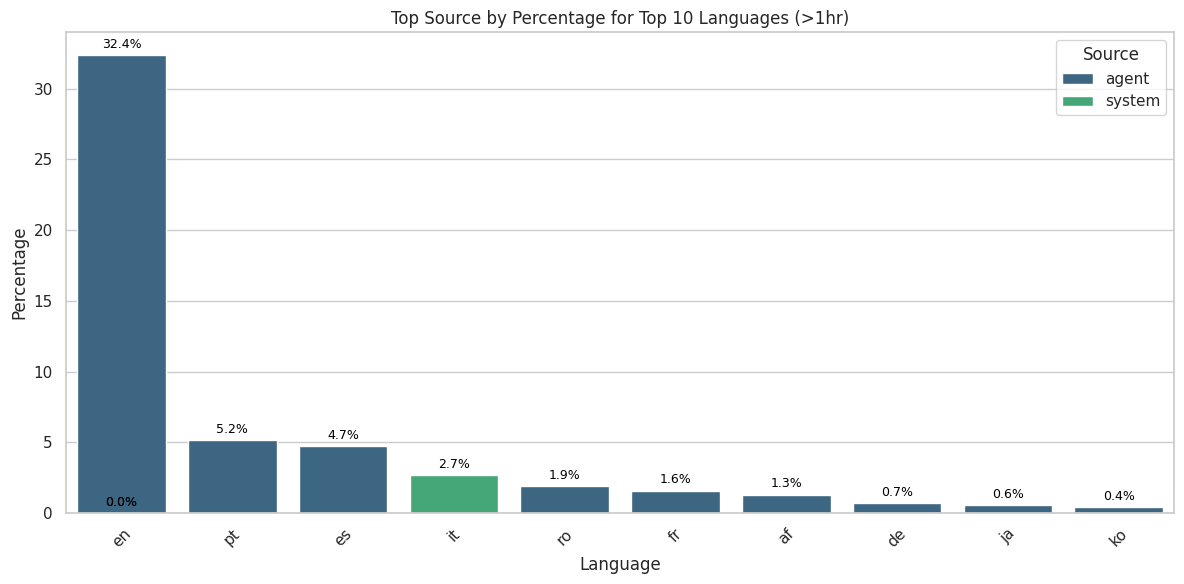

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


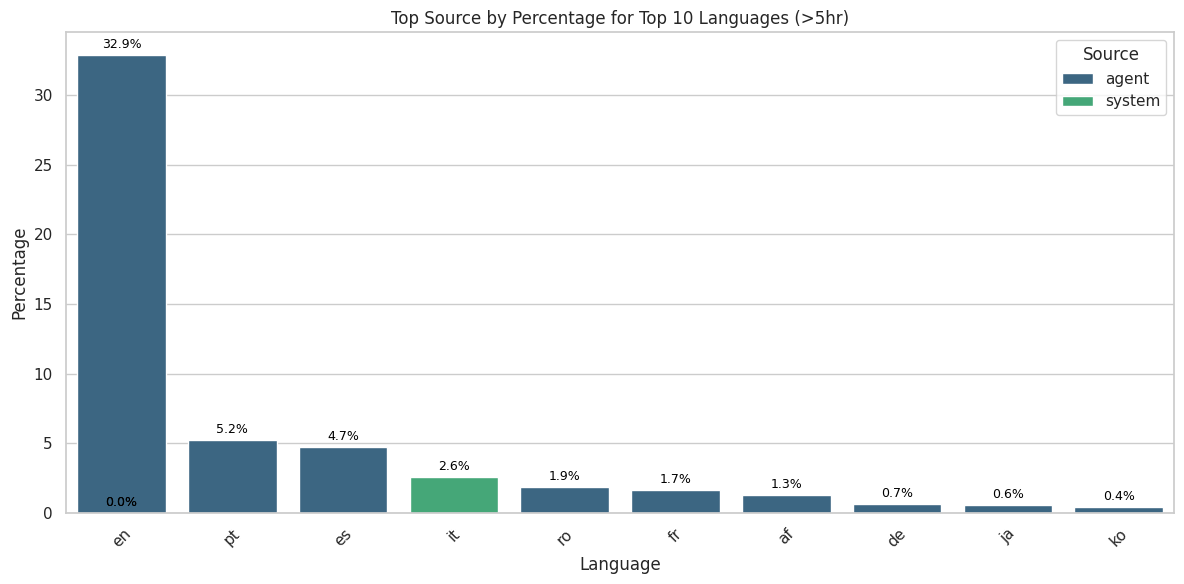

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


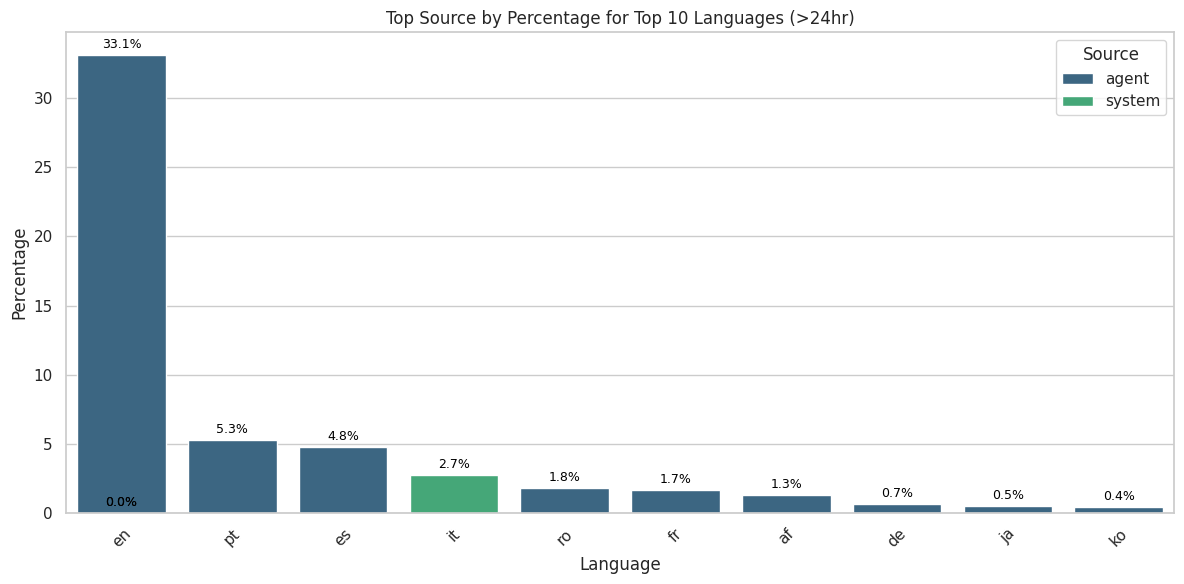

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


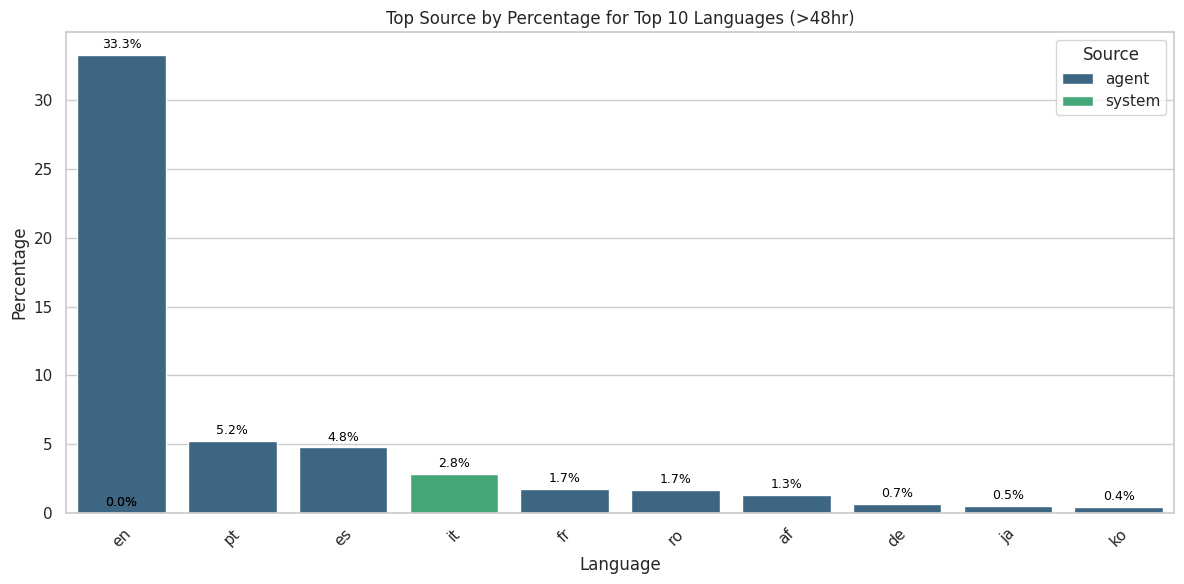

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


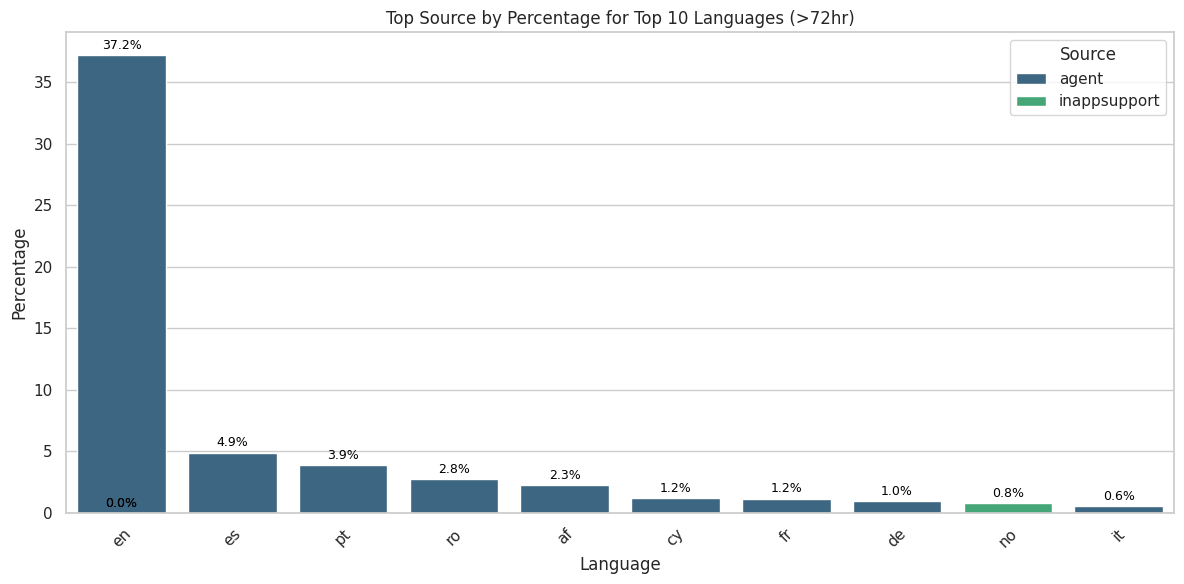

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


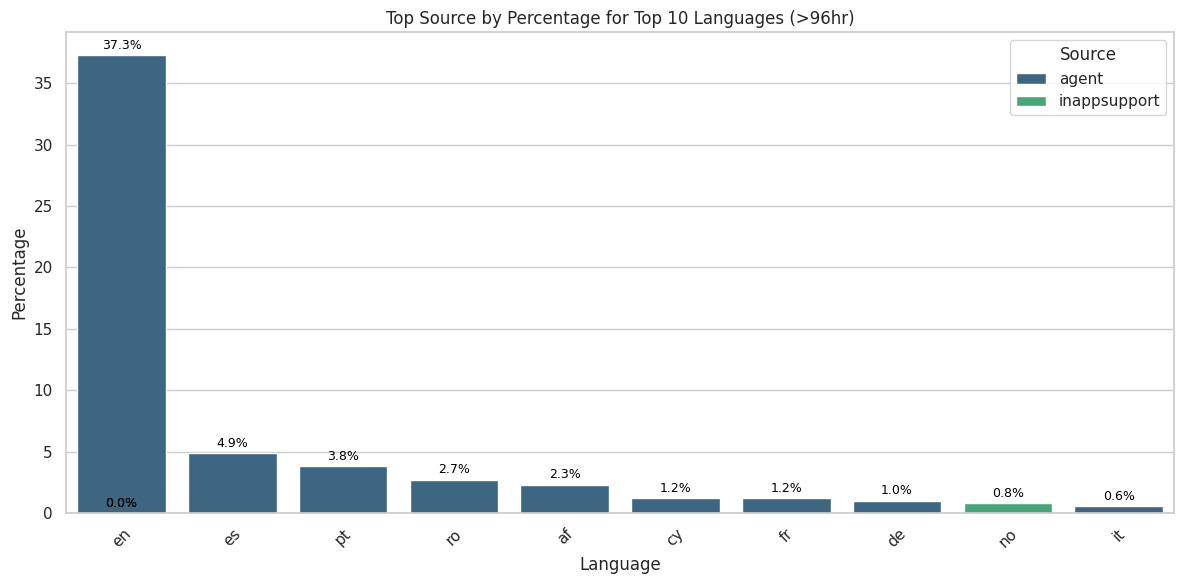

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


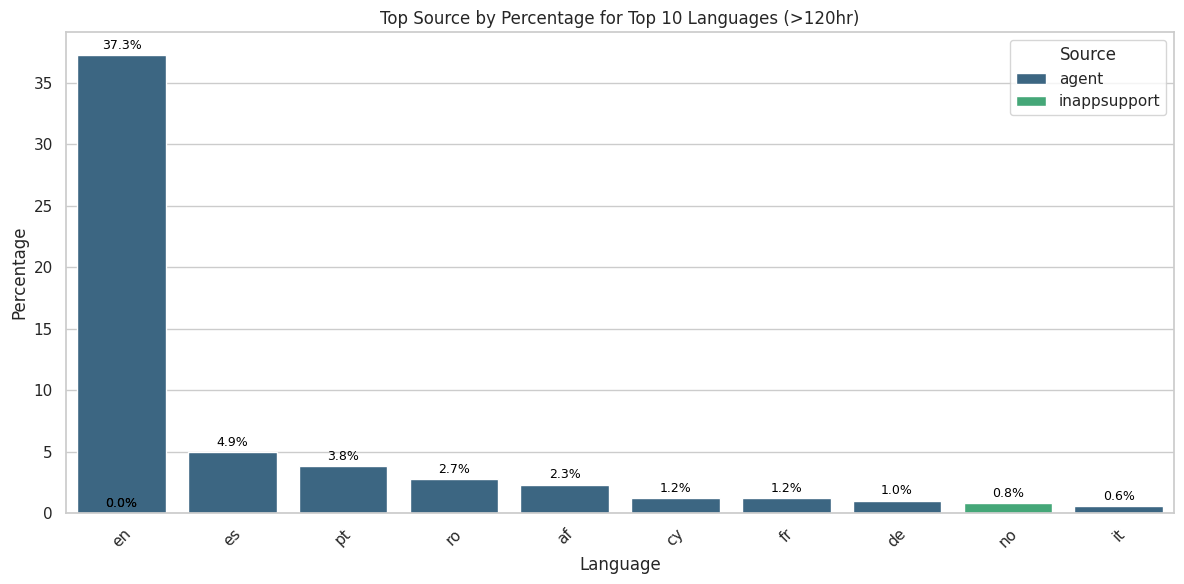

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


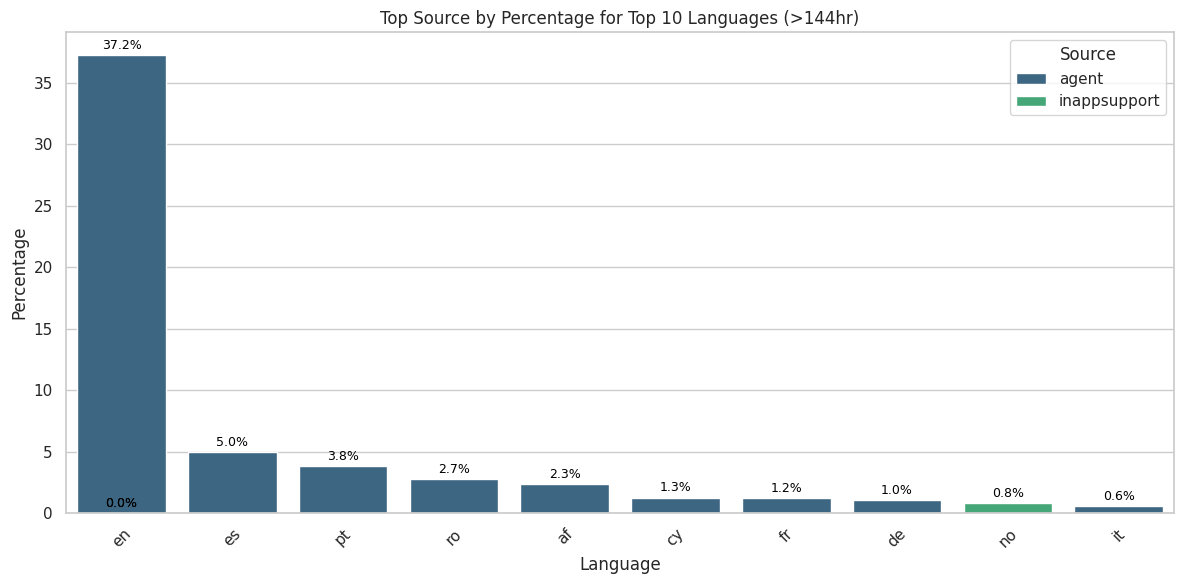

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


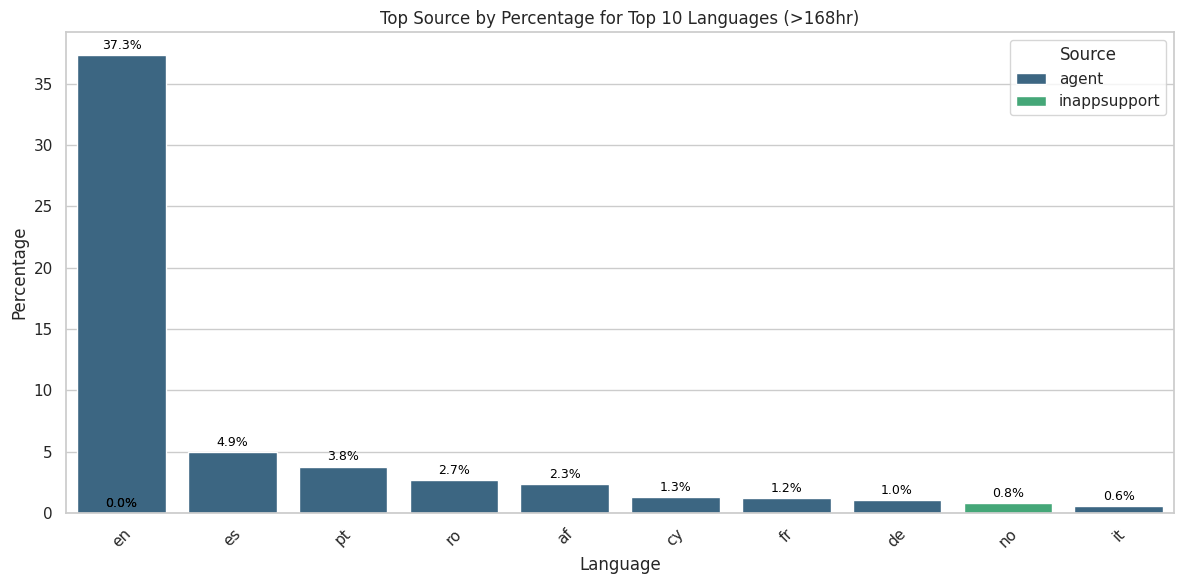

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


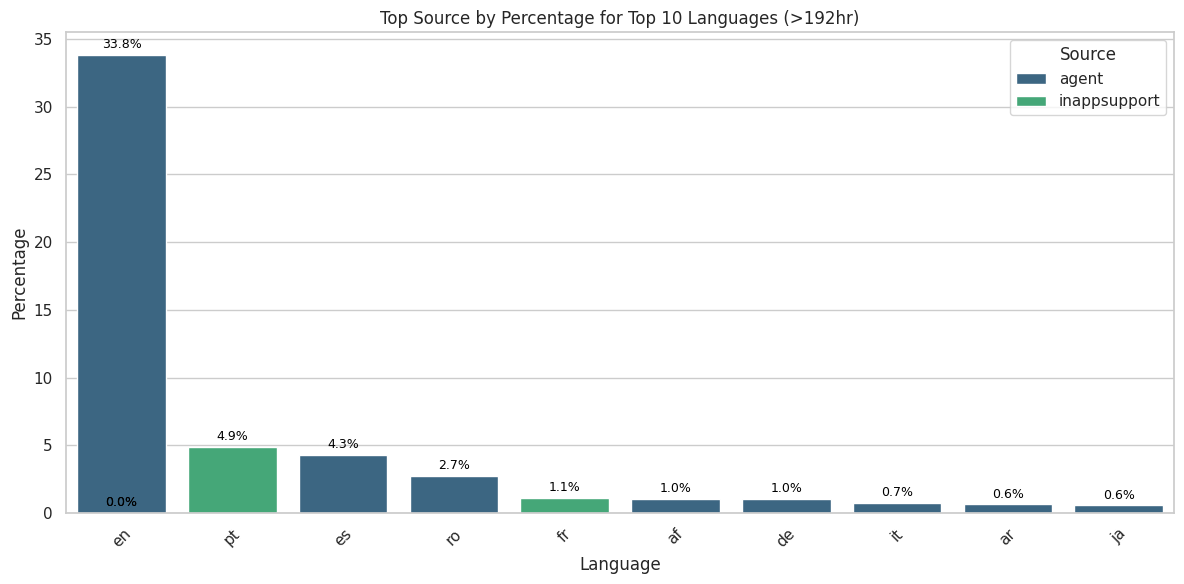

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


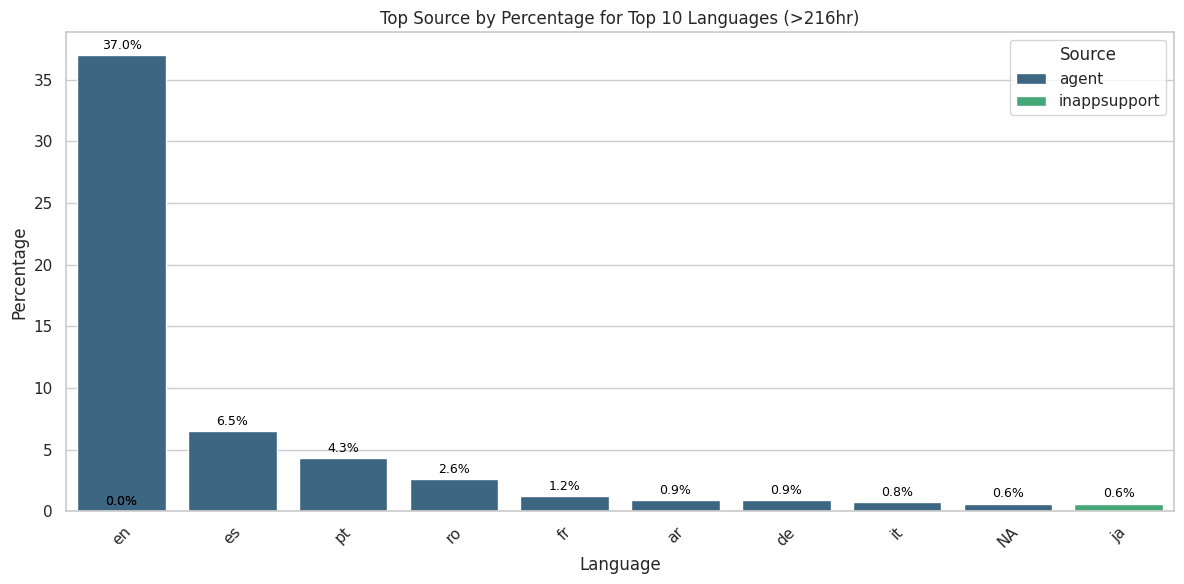

<ipython-input-420-96d0c7a31fba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100


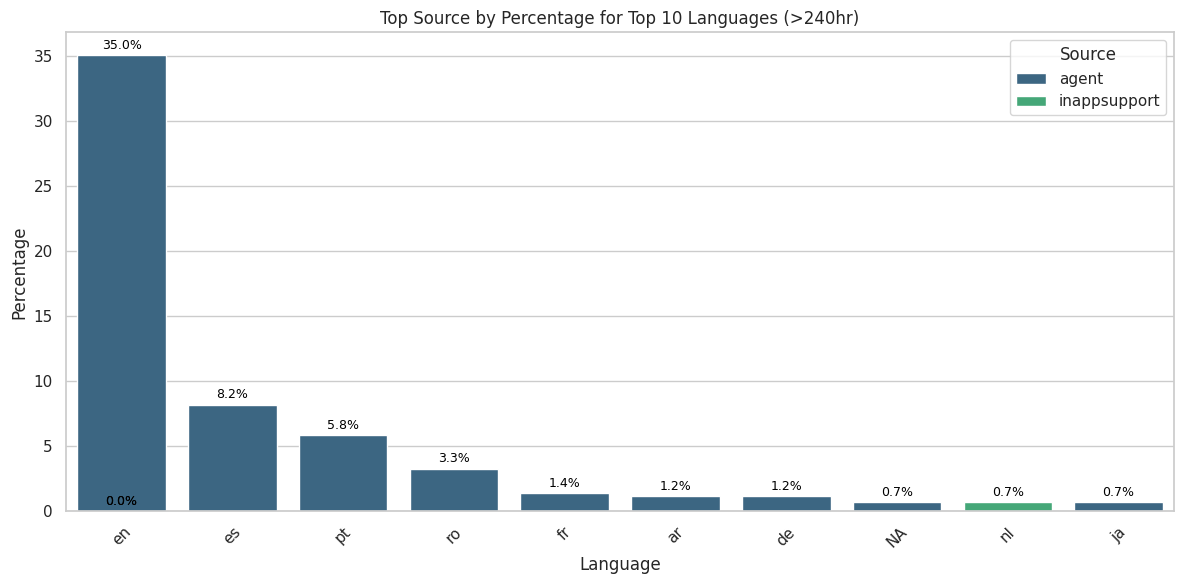

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot for each threshold
for label, df_grouped in language_source_summary.items():
    # Get top 10 languages by count
    language_totals = df_grouped.groupby('language')['count'].sum()
    top_languages = language_totals.nlargest(10).index

    # Filter only top 10 languages
    df_filtered = df_grouped[df_grouped['language'].isin(top_languages)]

    # Calculate percentage before sorting
    overall_total = df_filtered['count'].sum() # Use df_filtered for overall total
    df_filtered['percentage'] = (df_filtered['count'] / overall_total) * 100

    # Sort and pick top source per language
    top_sources = (
        df_filtered
        .sort_values(by=['language', 'percentage'], ascending=[True, False])
        .groupby('language')
        .head(1)
        .sort_values(by='percentage', ascending=False)
    )

    # Plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=top_sources,
        x='language',
        y='percentage',
        hue='source',
        dodge=False,
        palette='viridis'
    )

    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f"{bar.get_height():.1f}%",
            ha='center',
            fontsize=9,
            color='black'
        )

    plt.title(f"Top Source by Percentage for Top 10 Languages ({label})")
    plt.xlabel("Language")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.legend(title="Source")
    plt.tight_layout()
    plt.show()

No wLets try to find what day or week the messages which took this long to resolve were originated

In [ ]:
df['week'] = df['datestr'].dt.to_period('W').apply(lambda r: r.start_time.date())  # start of the week
df['date'] = df['datestr'].dt.date  # just date (optional)


In [ ]:
df.shape

(48975, 19)

In [ ]:
df_gt_1hr = df[df['response_time_sec'] > 3600]


In [ ]:
df.shape

(48975, 19)

In [ ]:
# Step 1: Total counts by language
weekly_counts = df_gt_1hr.groupby(['week', 'language'])['id'].count().reset_index(name='count')

top_languages = (
    weekly_counts.groupby('language')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

In [ ]:
df.shape

(48975, 19)

In [ ]:
weekly_counts = (
    df_gt_1hr
    .groupby(['week', 'language'])['id']  # or any column that uniquely identifies messages
    .count()
    .reset_index(name='count')
    .sort_values(['week', 'count'], ascending=[True, False])
)

print(weekly_counts.head(10))
weekly_counts_top10 = weekly_counts[weekly_counts['language'].isin(top_languages)]


          week language  count
0   2022-08-15       pt      1
9   2022-08-22       en   2158
10  2022-08-22       es    304
24  2022-08-22       pt    267
13  2022-08-22       fr    117
18  2022-08-22       it     85
2   2022-08-22       af     69
25  2022-08-22       ro     56
8   2022-08-22       de     40
20  2022-08-22       ko     25


In [ ]:
# Print full weekly count table
pd.set_option('display.max_rows', None)  # shows all rows
print(weekly_counts)


           week language  count
0    2022-08-15       pt      1
9    2022-08-22       en   2158
10   2022-08-22       es    304
24   2022-08-22       pt    267
13   2022-08-22       fr    117
18   2022-08-22       it     85
2    2022-08-22       af     69
25   2022-08-22       ro     56
8    2022-08-22       de     40
20   2022-08-22       ko     25
6    2022-08-22       cy     24
21   2022-08-22       nl     22
22   2022-08-22       no     21
4    2022-08-22       ca     18
7    2022-08-22       da     16
29   2022-08-22       so     14
34   2022-08-22       tr     13
23   2022-08-22       pl     11
1    2022-08-22       NA     10
3    2022-08-22       ar      9
26   2022-08-22       ru      8
33   2022-08-22       tl      8
37   2022-08-22    zh-cn      8
38   2022-08-22    zh-tw      6
19   2022-08-22       ja      5
31   2022-08-22       sv      5
17   2022-08-22       id      4
27   2022-08-22       sk      4
28   2022-08-22       sl      4
32   2022-08-22       sw      4
36   202

In [ ]:
# Example to filter data for >1hr (3600 seconds)
df_gt_1hr = df[df['response_time_sec'] > 3600]

# Similarly, define DataFrames for other thresholds
df_gt_5hr = df[df['response_time_sec'] > 18000]  # >5 hours = 18000 seconds
df_gt_24hr = df[df['response_time_sec'] > 86400]  # >24 hours = 86400 seconds
df_gt_48hr = df[df['response_time_sec'] > 172800]  # >48 hours = 172800 seconds
df_gt_72hr = df[df['response_time_sec'] > 259200]  # >72 hours = 259200 seconds
df_gt_96hr = df[df['response_time_sec'] > 345600]  # >96 hours = 345600 seconds
df_gt_120hr = df[df['response_time_sec'] > 432000]  # >120 hours = 432000 seconds
df_gt_144hr = df[df['response_time_sec'] > 518400]  # >144 hours = 518400 seconds
df_gt_168hr = df[df['response_time_sec'] > 604800]  # >168 hours = 604800 seconds
df_gt_192hr = df[df['response_time_sec'] > 691200]  # >192 hours = 691200 seconds
df_gt_216hr = df[df['response_time_sec'] > 777600]  # >216 hours = 777600 seconds
df_gt_240hr = df[df['response_time_sec'] > 864000]  # >240 hours = 864000 seconds


In [ ]:
df.shape

(48975, 19)

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


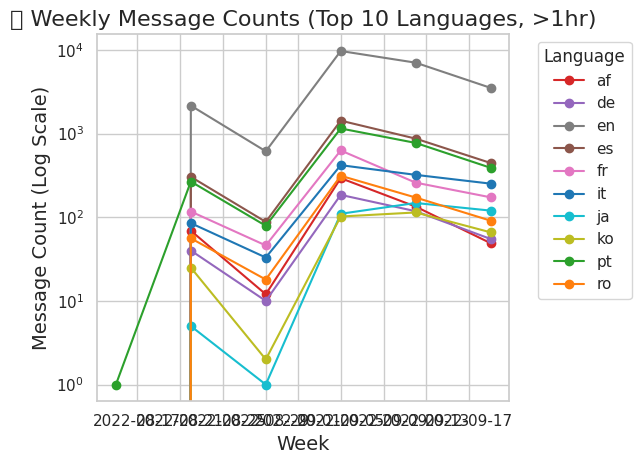

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


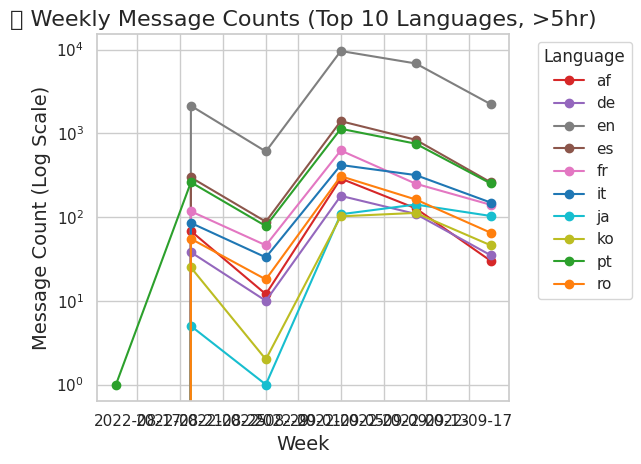

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


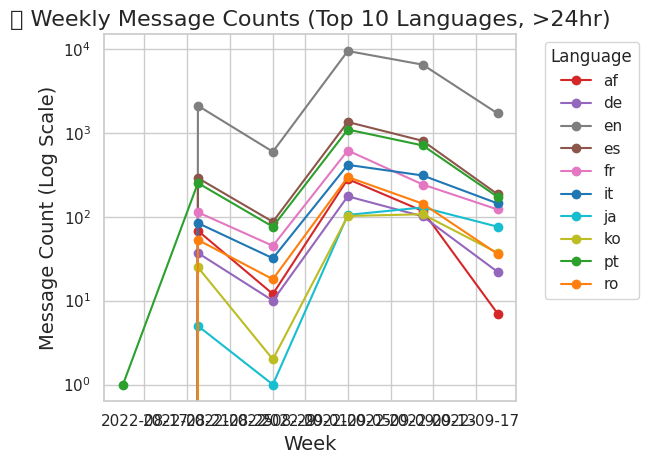

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


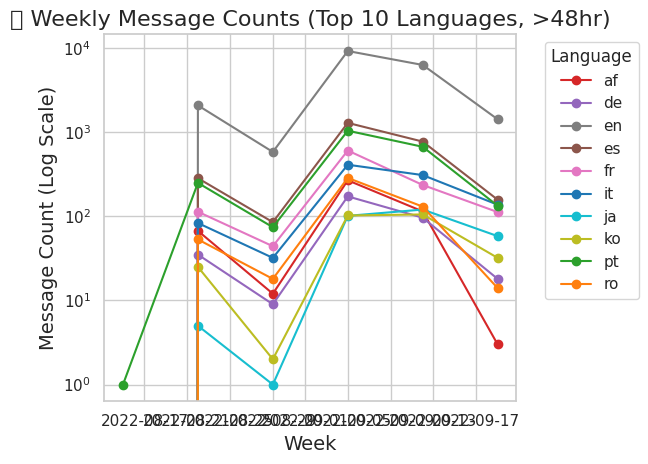

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


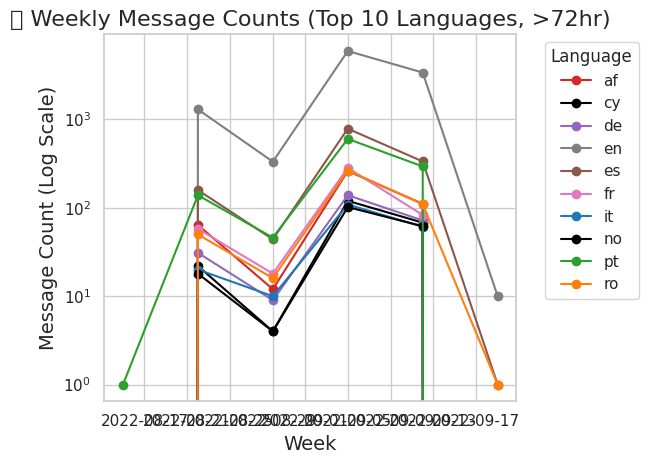

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


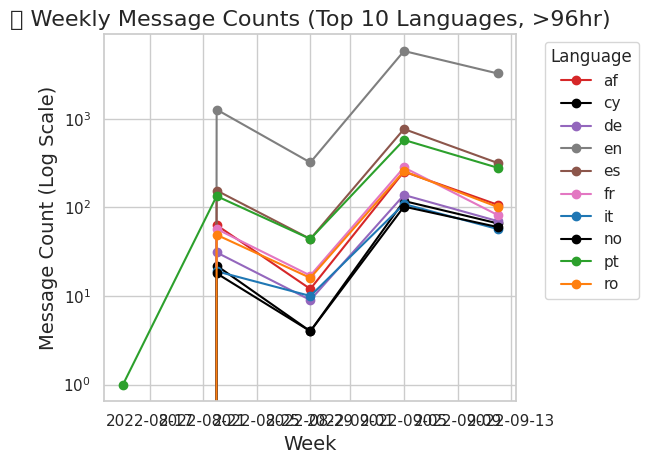

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


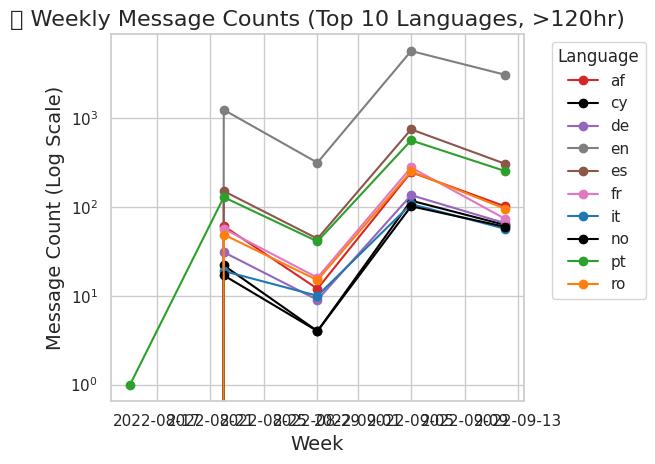

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


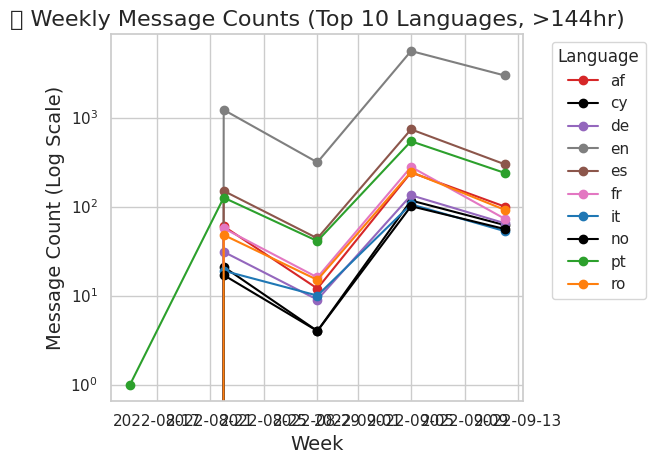

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


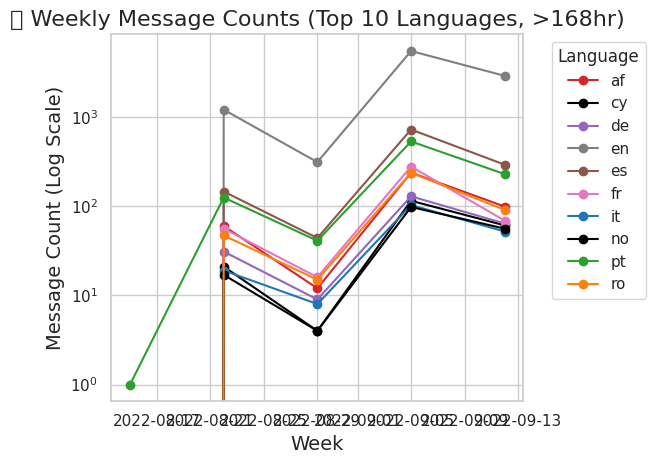

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


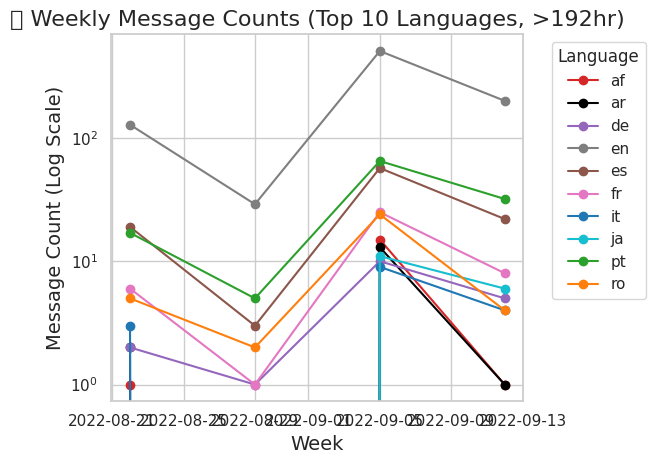

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


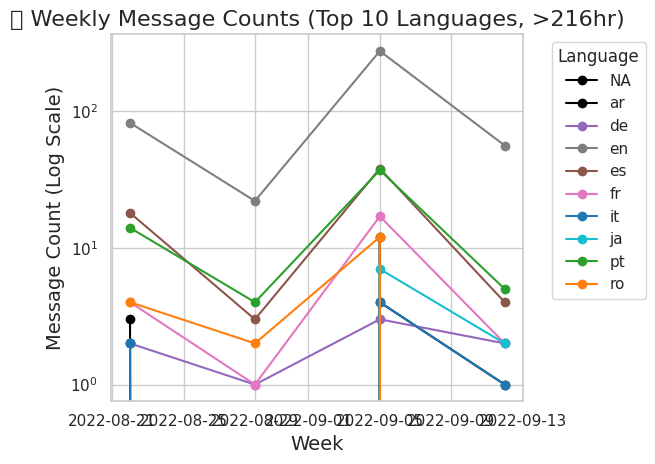

<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:56: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)
<ipython-input-435-dd677d81c83d>:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


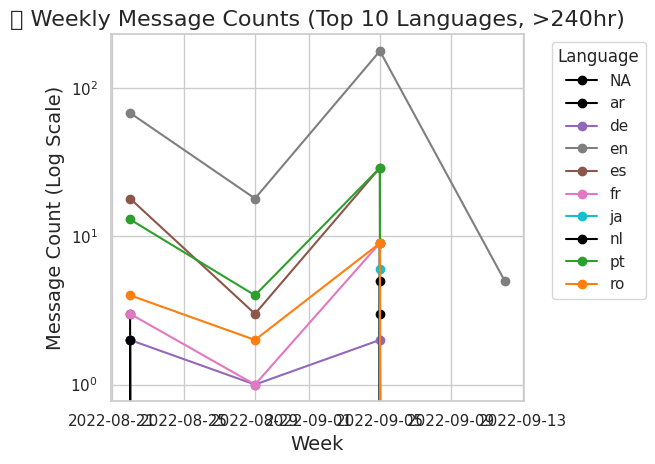

In [ ]:
import matplotlib.cm as cm

# Define a fixed color palette for the top 10 languages
language_colors = {
    'it': 'tab:blue',
    'ro': 'tab:orange',
    'pt': 'tab:green',
    'af': 'tab:red',
    'de': 'tab:purple',
    'es': 'tab:brown',
    'fr': 'tab:pink',
    'en': 'tab:gray',
    'ko': 'tab:olive',
    'ja': 'tab:cyan'
}

# Threshold DataFrames to loop through
threshold_dfs = {
    ">1hr": df_gt_1hr,
    ">5hr": df_gt_5hr,
    ">24hr": df_gt_24hr,
    ">48hr": df_gt_48hr,
    ">72hr": df_gt_72hr,
    ">96hr": df_gt_96hr,
    ">120hr": df_gt_120hr,
    ">144hr": df_gt_144hr,
    ">168hr": df_gt_168hr,
    ">192hr": df_gt_192hr,
    ">216hr": df_gt_216hr,
    ">240hr": df_gt_240hr
}

# Loop through the thresholds and generate line charts
for threshold, df_filtered in threshold_dfs.items():

    # Count messages by week and language
    weekly_counts = (
        df_filtered.groupby(['week', 'language'])['id']  # or any column that uniquely identifies messages
        .count()
        .reset_index(name='count')
        .sort_values(['week', 'count'], ascending=[True, False])
    )

    # Select top 10 languages by count for each week
    top_languages = weekly_counts.groupby('language')['count'].sum().nlargest(10).index
    weekly_counts_top10 = weekly_counts[weekly_counts['language'].isin(top_languages)]

    # Pivot the DataFrame for plotting
    pivot_df = weekly_counts_top10.pivot(index='week', columns='language', values='count').fillna(0)

    # Create a color list based on the languages in pivot_df
    plot_colors = [language_colors.get(language, 'black') for language in pivot_df.columns]

    # Plot as a line chart with increased width
    plt.figure(figsize=(16, 6))  # Increased the width of the chart (18 is wider than 14)
    ax = pivot_df.plot(kind='line', marker='o', linestyle='-', colormap='tab10', color=plot_colors)

    # Apply log scale to y-axis
    ax.set_yscale('log')

    # Customize the plot
    plt.title(f'📈 Weekly Message Counts (Top 10 Languages, {threshold})', fontsize=16)
    plt.xlabel('Week', fontsize=14)
    plt.ylabel('Message Count (Log Scale)', fontsize=14)
    plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


BOT VS HUMAN GENERATED MESSAGES


In [ ]:
# List all unique sources
sources = df['source'].unique()

# Display the sources
print(sources)


['agent' 'system' 'inappsupport' 'email' 'websupport' 'total_recall']


In [ ]:
df.shape

(48975, 19)

<ipython-input-438-8ea0947792ee>:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


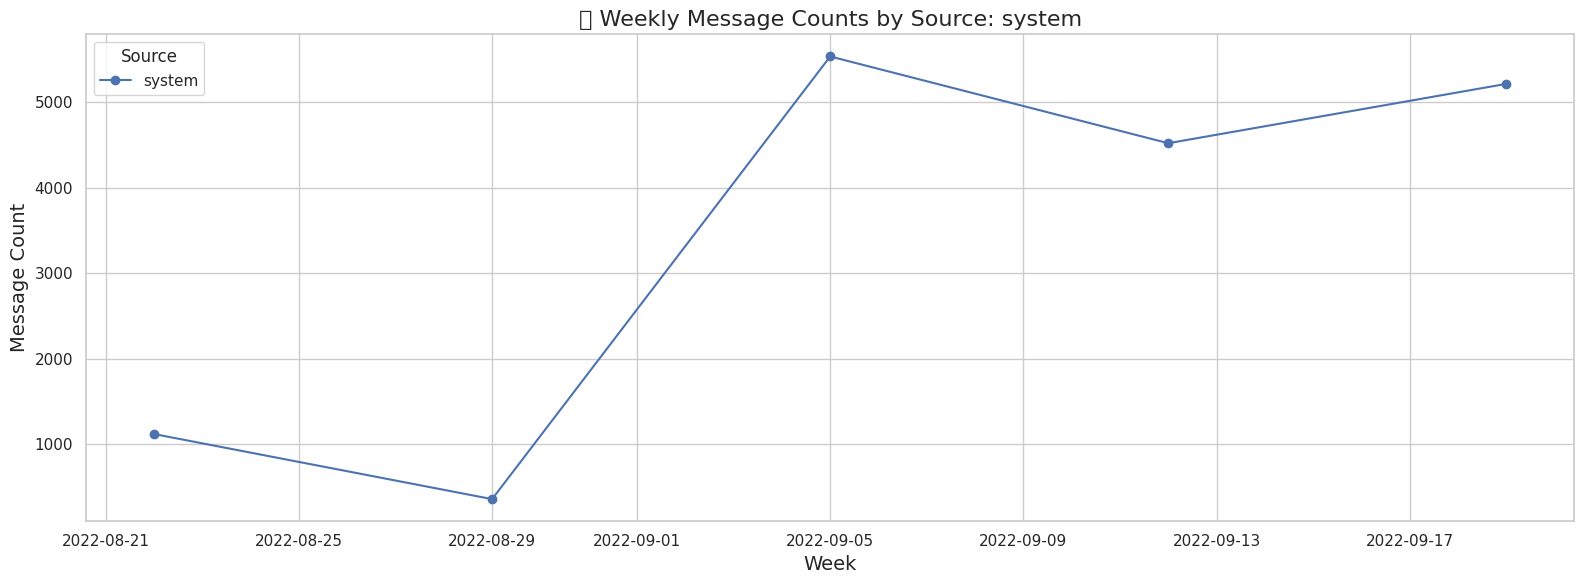

<ipython-input-438-8ea0947792ee>:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


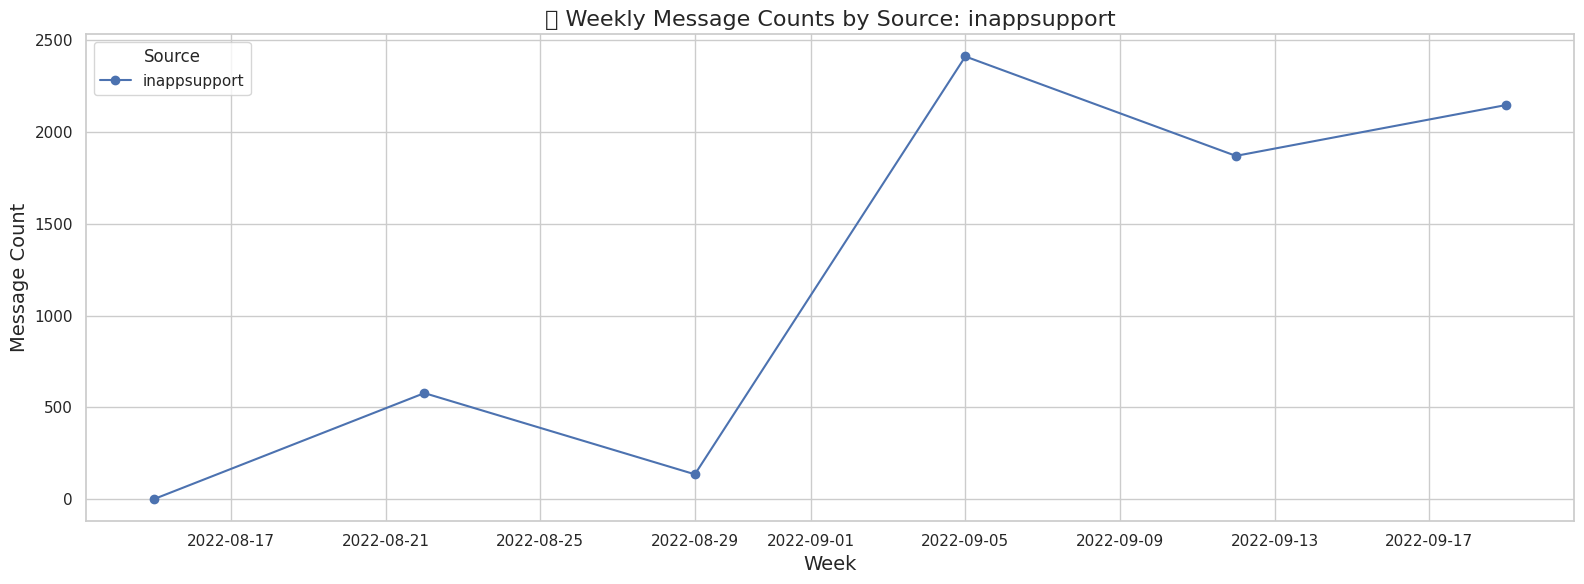

<ipython-input-438-8ea0947792ee>:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


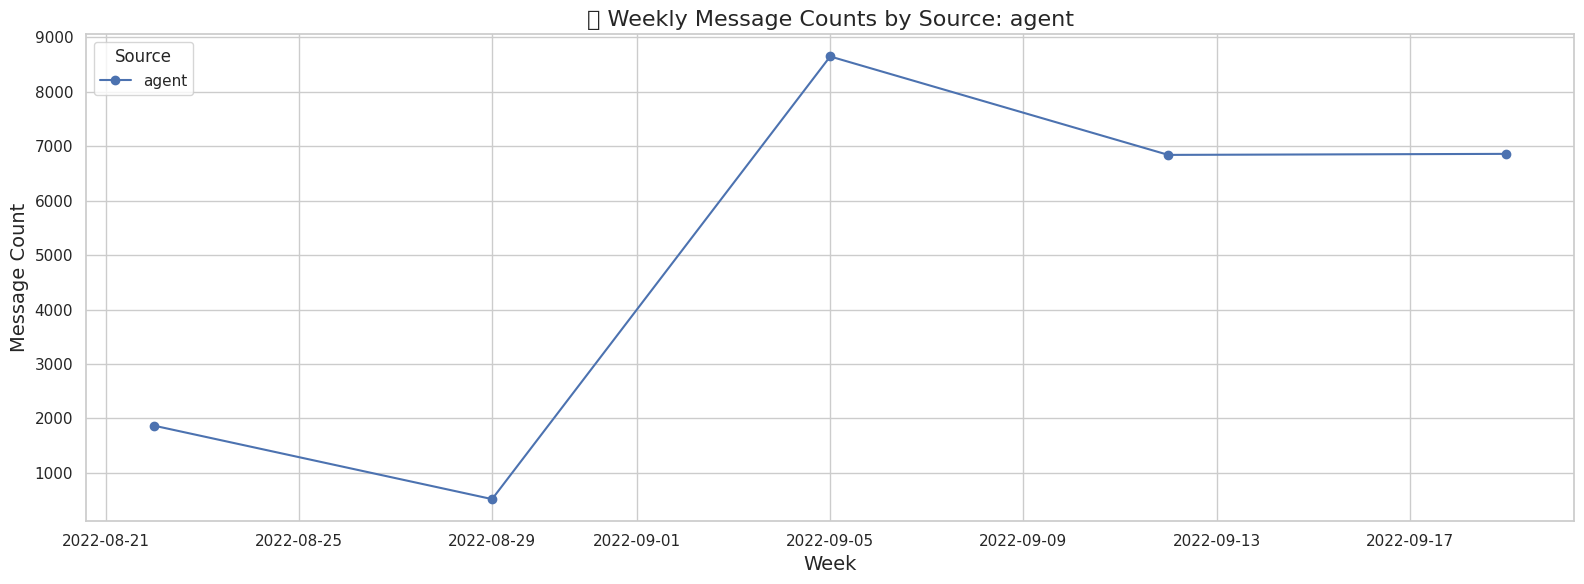

<ipython-input-438-8ea0947792ee>:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


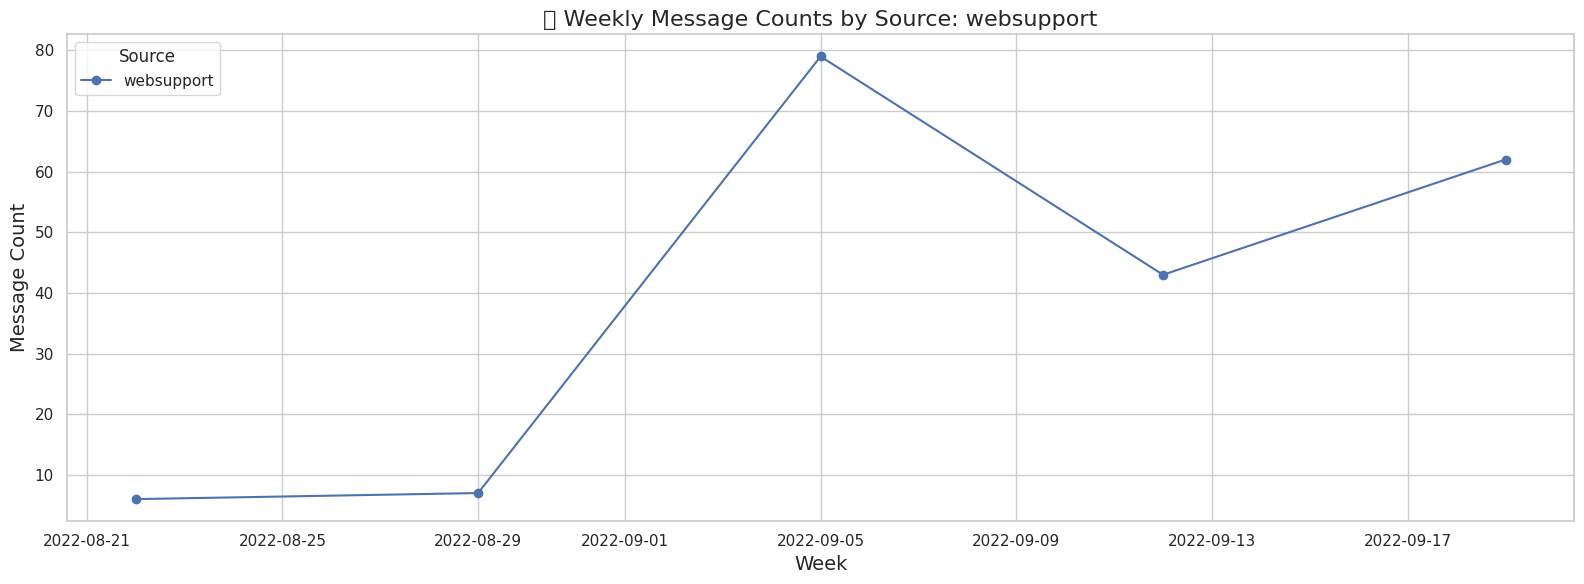

<ipython-input-438-8ea0947792ee>:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


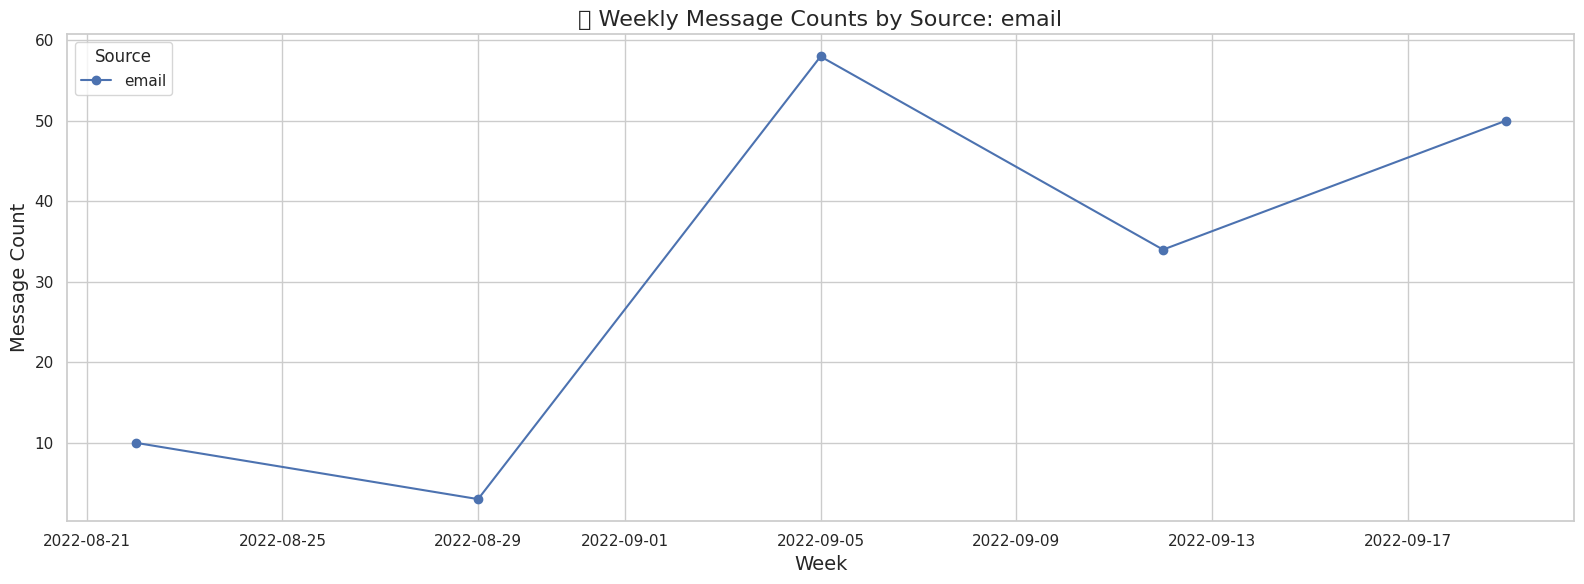

In [ ]:
# List of sources
sources = ['system', 'inappsupport', 'agent', 'websupport', 'email']

# Loop through each source
for source in sources:
    # Filter the DataFrame by source
    df_source = df[df['source'] == source]

    # Count messages by week and source
    weekly_counts = (
        df_source.groupby(['week'])['id']  # or any column that uniquely identifies messages
        .count()
        .reset_index(name='count')
        .sort_values(['week'], ascending=True)
    )

    # Plot as a line chart
    plt.figure(figsize=(16, 6))  # Increase the width of the chart
    plt.plot(weekly_counts['week'], weekly_counts['count'], marker='o', linestyle='-', label=source)

    # Customize the plot
    plt.title(f'📈 Weekly Message Counts by Source: {source}', fontsize=16)
    plt.xlabel('Week', fontsize=14)
    plt.ylabel('Message Count', fontsize=14)
    plt.legend(title='Source', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48975 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   _hoodie_commit_time  48975 non-null  int64         
 1   id                   48975 non-null  object        
 2   contact_id           48975 non-null  object        
 3   visibility           48975 non-null  object        
 4   creator_id           48975 non-null  object        
 5   source               48975 non-null  object        
 6   content              48975 non-null  object        
 7   is_duplicate         48975 non-null  bool          
 8   updated_at           48975 non-null  int64         
 9   created_at_epoch     48975 non-null  int64         
 10  datestr              48975 non-null  datetime64[ns]
 11  language             48975 non-null  object        
 12  week                 48975 non-null  object        
 13  date                 48975 non-null 

<ipython-input-440-ae1e6a234ac8>:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


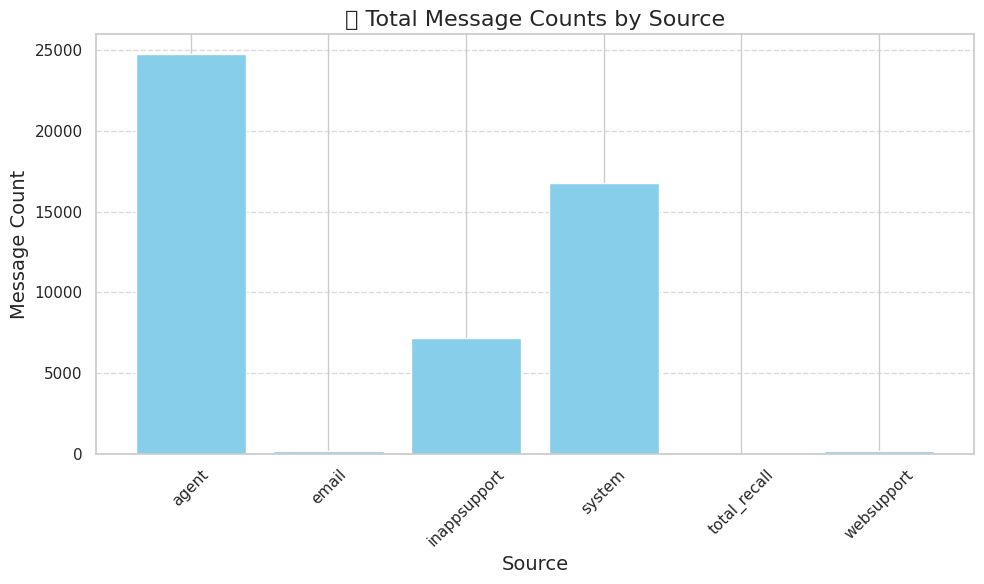

In [ ]:
# Count messages by source (irrespective of weeks)
source_counts = df.groupby('source')['id'].count().reset_index(name='count')

# Plot a bar chart showing the total count for each source
plt.figure(figsize=(10, 6))  # Increase the width of the chart
plt.bar(source_counts['source'], source_counts['count'], color='skyblue')

# Customize the plot
plt.title('📊 Total Message Counts by Source', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Message Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
top_messages = df['content'].value_counts().head(20).reset_index()
top_messages.columns = ['message_template', 'count']

print(top_messages)


                                     message_template  count
0                                      Chat requested   2443
1             Contact autocreated through Bliss Phone   1010
2                                     Chat solicitado    916
3                                         bot version    759
4                                          No content    593
5                        Have we resolved this issue?    363
6                               <br>  Yes<br>  No<br>    308
7                  <i>Phone conversation resolved</i>    306
8   <br>  My order never arrived<br>  Wrong or mis...    279
9   Thanks for providing this information. We’ll c...    229
10                            Chat ended by Support\n    172
11  <br>  My order never arrived<br>  Wrong or mis...    167
12                                                 No    158
13             You are currently number 10+ in line.     150
14                          How can I help you today?    146
15  <br>  My order never

<ipython-input-448-d84f73096ecc>:7: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-448-d84f73096ecc>:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


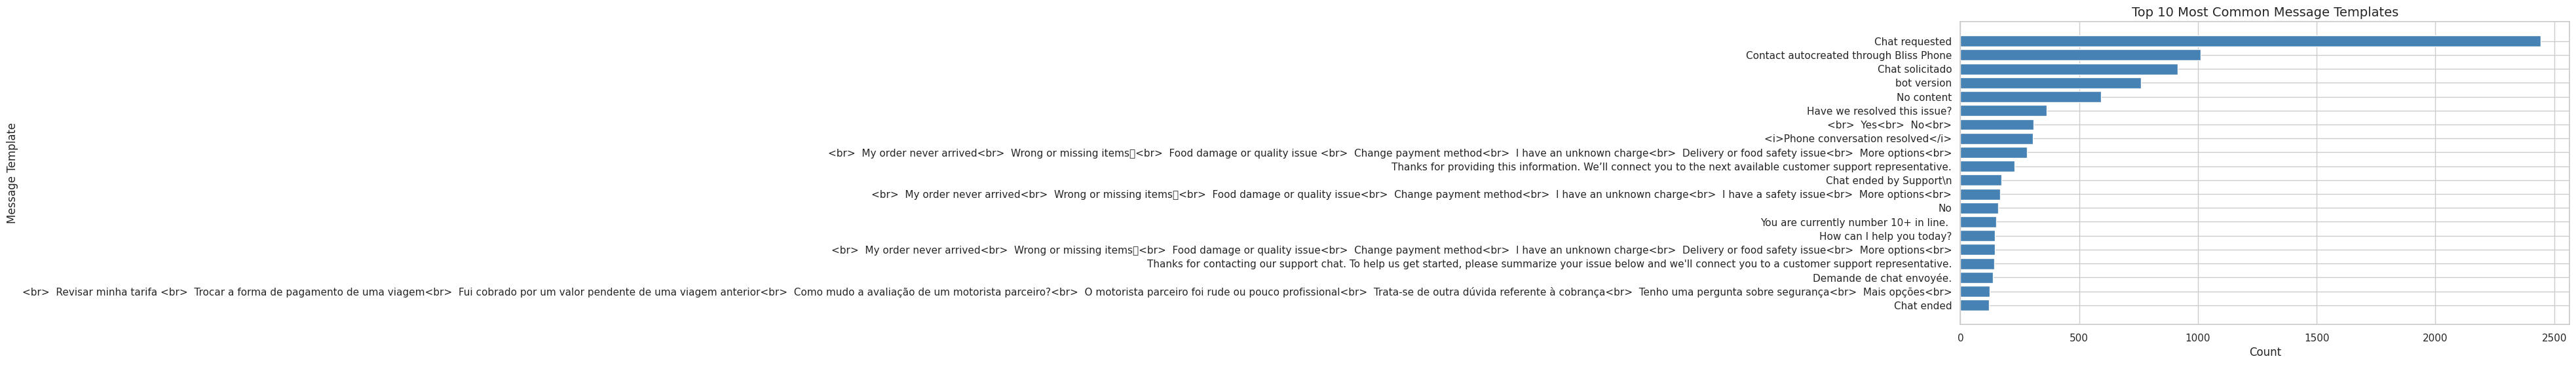

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top_messages['message_template'], top_messages['count'], color='steelblue')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Message Template", fontsize=12)
plt.title("Top 10 Most Common Message Templates", fontsize=14)
plt.gca().invert_yaxis()  # Puts the highest count at the top
plt.tight_layout()
plt.show()


In [ ]:
print(df_gt_240hr.columns)


Index(['_hoodie_commit_time', 'id', 'contact_id', 'visibility', 'creator_id',
       'source', 'content', 'is_duplicate', 'updated_at', 'created_at_epoch',
       'datestr', 'language', 'week', 'date', 'response_time_sec',
       'updated_time', 'created_time', 'created_hour', 'response_time_min'],
      dtype='object')


In [ ]:
print(df_gt_1hr.shape)
print(df_gt_1hr.head())
df_gt_240hr.dtypes


(35933, 19)
   _hoodie_commit_time                                    id  \
4       20220910200846  86cbd715-4b56-4d38-a379-edbce7db7400   
5       20220916001925  c090ff6f-82a8-4c47-8e7a-4e7de19fd912   
6       20220911001413  bfbb5a85-6127-4225-b02d-ca07862f680d   
7       20220911001413  4540542b-5597-4e68-9880-5b2f2fcb55d9   
8       20220910162003  04c696a1-0b2d-4436-8477-6130abe7bc11   

                             contact_id visibility  \
4  33a21bcb-cc9c-4ccb-8f0f-e573e24d38e8   external   
5  e2fd4f11-e8fb-44d4-9cfa-e4c4348198f9   external   
6  b74d8ce6-7a4e-47b3-ac5f-5836920fce10   internal   
7  837079cc-ddf1-492a-8099-0950250a1c9c   internal   
8  8294fd3d-62a3-426e-ba0f-c116f15bddb3   internal   

                             creator_id        source  \
4                               Unknown        system   
5  59c67c57-1a54-4a06-ac3f-10fe9dc3adec  inappsupport   
6  00000000-0000-0000-0000-000000000003        system   
7  00000000-0000-0000-0000-000000000003        sys

,0
_hoodie_commit_time,int64
id,object
contact_id,object
visibility,object
creator_id,object
source,object
content,object
is_duplicate,bool
updated_at,int64
created_at_epoch,int64


In [ ]:
print(df_gt_240hr.shape)


(458, 19)


In [ ]:
top_messages_72hr = df_gt_72hr['content'].value_counts().head(20).reset_index()
top_messages_72hr.columns = ['message_template', 'count']
print(top_messages_72hr)

                                     message_template  count
0                                         bot version    345
1                                          No content    298
2             Contact autocreated through Bliss Phone    295
3                                      Chat requested    280
4                        Have we resolved this issue?    204
5                               <br>  Yes<br>  No<br>    164
6                  <i>Phone conversation resolved</i>    155
7   Thanks for providing this information. We’ll c...    117
8                                                  No     82
9                             Chat ended by Support\n     81
10              Merge duplicate account investigation     68
11  Thanks for contacting our support chat. To hel...     67
12             You are currently number 10+ in line.      63
13  Thanks for contacting Uber Support. To help us...     62
14                                                Yes     59
15                      

TOP Message which were not resolved till 72hr

<ipython-input-471-d05813d03d9d>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


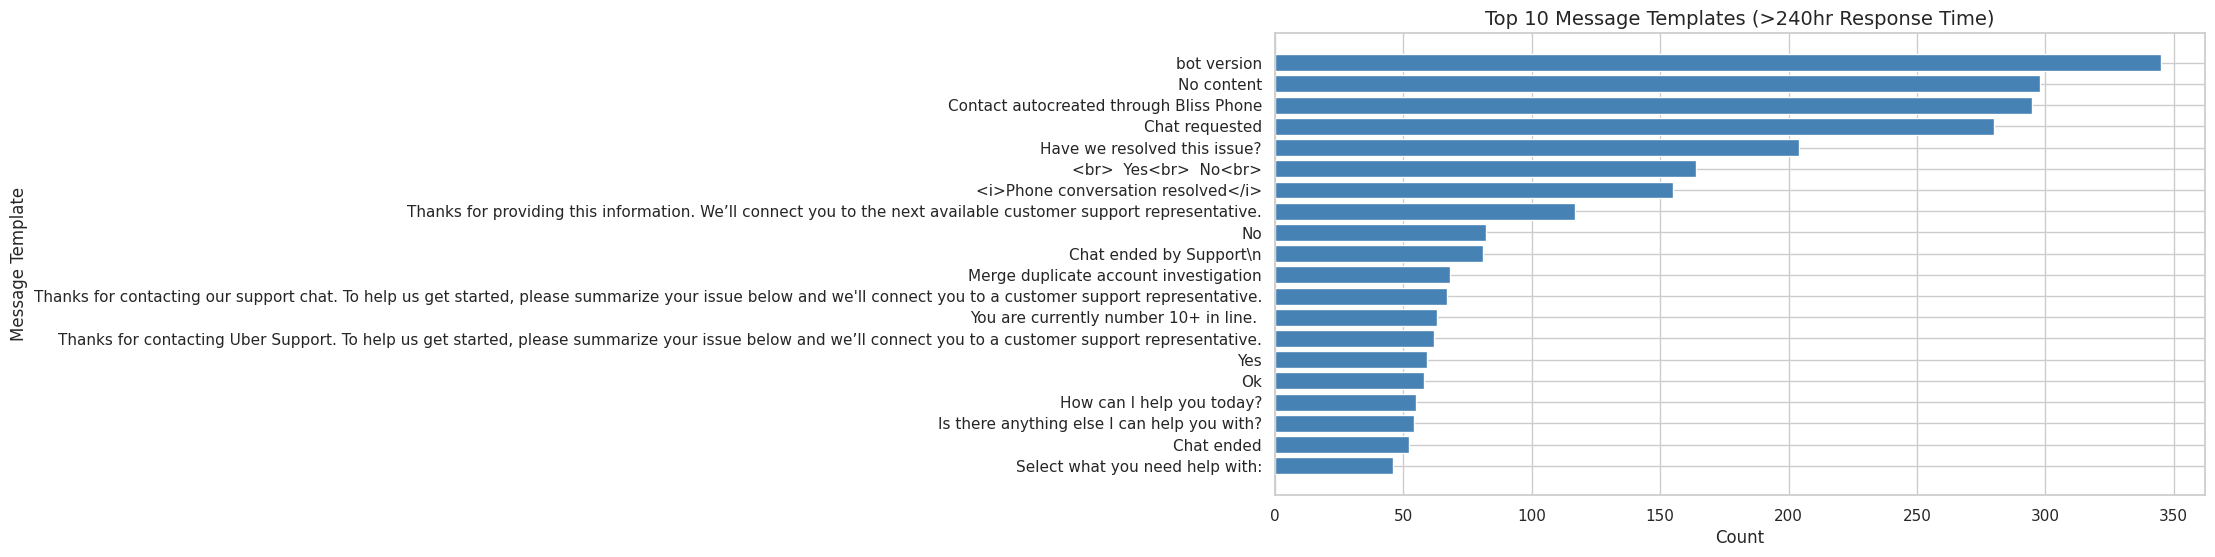

In [ ]:
# Get top 10 most common message templates where response_time > 240hr


# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_messages_72hr['message_template'], top_messages_72hr['count'], color='steelblue')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Message Template", fontsize=12)
plt.title("Top 10 Message Templates (>240hr Response Time)", fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Count duplicates and non-duplicates
duplicate_summary = df['is_duplicate'].value_counts(normalize=True).reset_index()
duplicate_summary.columns = ['is_duplicate', 'proportion']
duplicate_summary['percentage'] = (duplicate_summary['proportion'] * 100).round(2)

print(duplicate_summary)


   is_duplicate  proportion  percentage
0         False    0.995242       99.52
1          True    0.004758        0.48


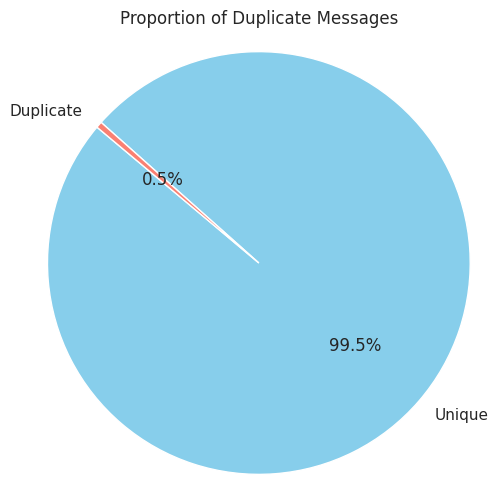

In [ ]:
labels = ['Unique', 'Duplicate']
sizes = df['is_duplicate'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Proportion of Duplicate Messages")
plt.axis('equal')
plt.show()


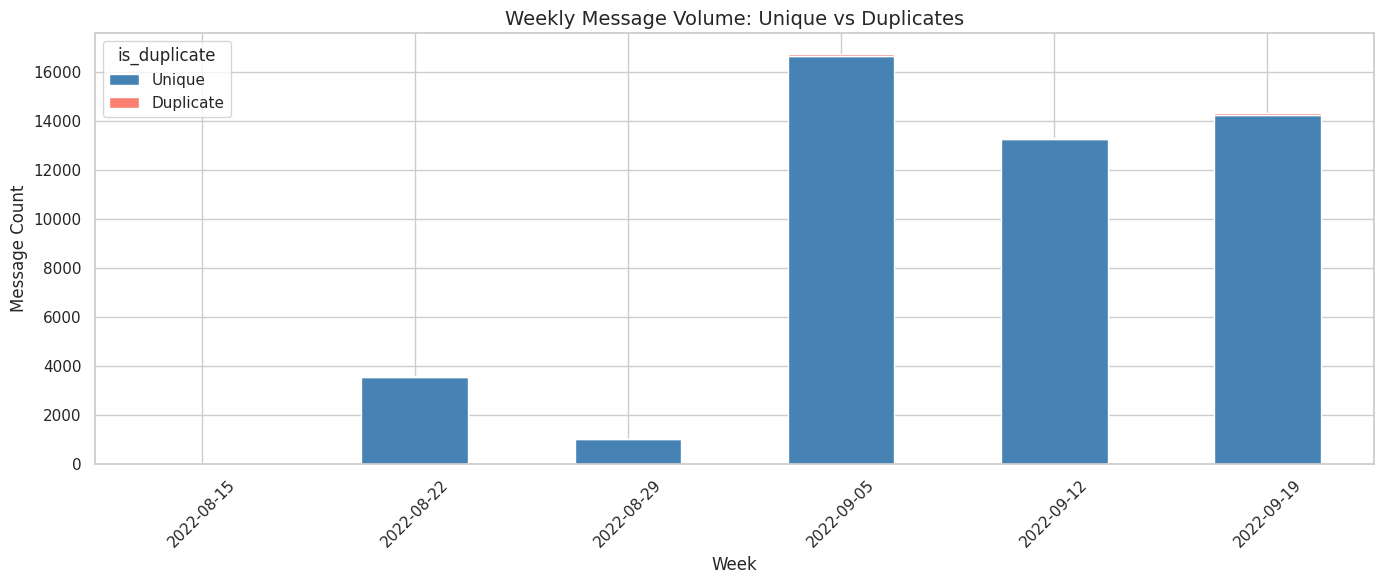

In [ ]:

df['datestr'] = pd.to_datetime(df['datestr'])  # Convert 'datestr' to datetime
df['week'] = df['datestr'].dt.to_period('W').apply(lambda r: r.start_time.date())  # start of the week
df['date'] = df['datestr'].dt.date  # just date (optional)

impact_by_week = (
    df.groupby(['week', 'is_duplicate'])['id']
    .count()
    .reset_index(name='count')
    .pivot(index='week', columns='is_duplicate', values='count')
    .fillna(0)
    .rename(columns={False: 'Unique', True: 'Duplicate'})
)


impact_by_week.plot(kind='bar', stacked=True, figsize=(14, 6), color=['steelblue', 'salmon'])
plt.title("Weekly Message Volume: Unique vs Duplicates", fontsize=14)
plt.ylabel("Message Count")
plt.xlabel("Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter duplicate messages
duplicate_messages = df[df['is_duplicate'] == True]

# Count top duplicate message templates
top_duplicate_templates = (
    duplicate_messages['content']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'message_template', 'content': 'count'})
)

print("Top 10 Duplicate Message Templates:")
print(top_duplicate_templates)


Top 10 Duplicate Message Templates:
                                               count  count
0             <b>I was charged for my order</b>: Yes      5
1             <b>I was charged for my order</b>: yes      2
2  <b>My driver asked to cancel</b>: false<br/><b...      2
3                    <b>Date of trip</b>: 2022-09-19      2
4  <b>Add a photo of the order or the receipt her...      2
5  <b>Were you in the cab when the trip started?<...      2
6  <b>I paid toll fee in the form of cash apart f...      1
7                    <b>Date of Trip</b>: 2022-09-10      1
8  <b>Expliquez-nous ce qui s&#39;est passé</b>: ...      1
9  <b>Onde você quer dirigir?</b>: Sorocaba SP <b...      1


Decoding of Analysis:

Not a lot of missing data, only a few rows in creator id and content which were replaced by "No creator ID" and Content not Available" respectively.

After doing daily and weekly trend analysis based on the language in chat we can conclude there was an increase all around the globe . Same pattern was seen accross all languages.

Which can mean two things either the data provided is not distributed equally across all dates or the there was some other issue or it could mean there was no tickets raised at all which is kind of not possible .

But looking at the most common chat content, the top request was "Chat requested" which doesn't gives us anything .

2nd was "Content autocreated through bliss phone" which tell us something if we know what it means.

3rd was Chat solicitado which is spanish which gives us insight that spanish users are the second highest after english speaking. Which makes sense as the number of spanish speaking countries are high in number. Same goes for porteguese because of Brazil.

More over a large amount of tickets took longer than 1hr to be closed. Which could mean either they were updated late or the ticket was hard to resolve. A large number of ticket took days to resolve.

During hourly analysis it was found that more tickets were raised 16:00 hr and remained at same level throught midnight , shouwing a spike afteward and sharply falling after 2:00 hr which could give us into insight of user trend. Could be because of more orders after a certain time of day leading to higher ticket raised through chat.

What Can we do More :

We can find the contents which took more than >1hr >5hr etc to get resolved and find the type of problem if mentioned in content.

